# 🎯 Análisis de Reseñas de Amazon España (Trustpilot)
## 👥 Proyecto End-to-End de Data Science - Análisis de Sentimiento

**Autor:** Data Scientist
**Fecha:** Enero 2026

**Objetivo del Proyecto:** Desarrollar un sistema completo de análisis de datos textuales que simule el trabajo de un Data Scientist contratado para analizar la percepción online de una marca. El proyecto incluye extracción de datos, procesamiento NLP y generación de visualizaciones con valor de negocio.

**Metodología (4 Fases):**
1. 📥 **FASE 1 | Rubén**: Adquisición de Datos (Web Scraping) - Extraer 50-100 reseñas de Trustpilot
2. 🧹 **FASE 2 | Juanes**: Preprocesamiento y Limpieza (NLP) - Limpieza, tokenización y eliminación de stopwords
3. 💎 **FASE 3 | Rubén**: Extracción de Valor y Análisis - Frecuencias y análisis de sentimiento
4. 📊 **FASE 4 | Juanes**: Visualización e Inteligencia (BI) - Gráficos y nube de palabras

**Contexto según Trustpilot:** Amazon España tiene una puntuación de 1.5/5 ("Muy malo"). Los usuarios expresan insatisfacción con atención al cliente, entregas y gestión de pedidos, especialmente en periodos navideños.

# 🚀 CONFIGURACIÓN DEL ENTORNO (Rubén)

In [16]:
# =============================================================================
# CELDA 1: CONFIGURACIÓN DEL ENTORNO COLAB E INSTALACIÓN DE DEPENDENCIAS
# =============================================================================
# Esta celda configura el entorno básico para Google Colab
# Instala todas las dependencias necesarias del proyecto
# Usa versiones compatibles con el entorno de Colab
# =============================================================================

print("=" * 70)
print("🔧 CONFIGURANDO GOOGLE COLAB")
print("Responsable: Rubén")
print("=" * 70)

# 1. Actualizar pip primero
!pip install --upgrade pip -q

print("\n📦 INSTALANDO DEPENDENCIAS PRINCIPALES...")

# ------------------------------------------
# Core & Data Manipulation (ya están en Colab, solo verificar)
# ------------------------------------------
print("   • Verificando pandas y numpy...")
!pip show pandas numpy > /dev/null 2>&1 || pip install pandas numpy -q

# ------------------------------------------
# Web Scraping (Fase 1)
# ------------------------------------------
print("   • Instalando herramientas de web scraping...")
!pip install requests beautifulsoup4 lxml -q

# ------------------------------------------
# NLP Processing (Fase 2)
# ------------------------------------------
print("   • Instalando herramientas NLP...")
!pip install nltk textblob regex -q

# spaCy con instalación simplificada
try:
    import spacy
    print("   • spaCy ya está instalado")
except ImportError:
    print("   • Instalando spaCy...")
    !pip install spacy -q
    print("   • Descargando modelo español para spaCy...")
    !python -m spacy download es_core_news_sm -q

# ------------------------------------------
# Visualization (Fase 4)
# ------------------------------------------
print("   • Instalando herramientas de visualización...")
!pip install matplotlib seaborn plotly -q

# WordCloud con manejo de error específico
try:
    from wordcloud import WordCloud
    print("   • WordCloud ya está instalado")
except ImportError:
    print("   • Instalando WordCloud...")
    !pip install wordcloud -q

# ------------------------------------------
# Utilities & Notebooks
# ------------------------------------------
print("   • Instalando utilidades adicionales...")
!pip install tqdm python-dotenv -q

# googletrans con manejo de error
try:
    from googletrans import Translator
    print("   • googletrans ya está instalado")
except ImportError:
    print("   • Instalando googletrans...")
    !pip install googletrans -q

print("\n✅ VERIFICANDO INSTALACIONES BÁSICAS...")

# Verificar que las librerías básicas se pueden importar
try:
    import pandas as pd
    import numpy as np
    import requests
    from bs4 import BeautifulSoup
    import nltk
    from textblob import TextBlob
    import matplotlib.pyplot as plt
    print("   • ✅ Librerías básicas importadas correctamente")
except ImportError as e:
    print(f"   • ❌ Error importando {e}")

print("\n" + "=" * 70)
print("✅ ENTORNO CONFIGURADO CORRECTAMENTE")
print("=" * 70)
print("\n📝 NOTA: Si hay errores de compatibilidad, puedes reiniciar el runtime")
print("   en Colab (Runtime → Restart runtime) después de esta instalación.")
print("=" * 70)

🔧 CONFIGURANDO GOOGLE COLAB
Responsable: Rubén
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 22.1 MB/s eta 0:00:00

📦 INSTALANDO DEPENDENCIAS PRINCIPALES...
   • Verificando pandas y numpy...
   • Instalando herramientas de web scraping...
   • Instalando herramientas NLP...
   • spaCy ya está instalado
   • Instalando herramientas de visualización...
   • WordCloud ya está instalado
   • Instalando utilidades adicionales...
   • Instalando googletrans...

✅ VERIFICANDO INSTALACIONES BÁSICAS...
   • ✅ Librerías básicas importadas correctamente

✅ ENTORNO CONFIGURADO CORRECTAMENTE

📝 NOTA: Si hay errores de compatibilidad, puedes reiniciar el runtime
   en Colab (Runtime → Restart runtime) después de esta instalación.


# 📚 IMPORTAR LIBRERÍAS BÁSICAS (Juanes)

In [17]:
# =============================================================================
# CELDA 2: IMPORTAR LIBRERÍAS BÁSICAS (Juanes)
# =============================================================================
# Importa todas las librerías necesarias para el proyecto completo
# Esta celda debe ejecutarse después de la configuración
# =============================================================================

print("\n" + "="*70)
print("📚 IMPORTANDO LIBRERÍAS BÁSICAS")
print("Responsable: Juanes")
print("="*70)


# Core data manipulation
import pandas as pd
import numpy as np

# Web scraping
import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin, urlparse

# NLP and text processing
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from textblob import TextBlob
from googletrans import Translator

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import plotly.express as px

# Utilities
import time
import warnings
from datetime import datetime
from collections import Counter
from typing import List, Dict, Optional, Tuple

# Configurar warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 200)

# Configurar matplotlib para Colab
%matplotlib inline
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Descargar recursos NLTK
print("📥 DESCARGANDO RECURSOS NLTK...")
nltk.download('punkt', quiet=True)
nltk.download('punkt_tab', quiet=True)
nltk.download('stopwords', quiet=True)

print("✅ Librerías básicas importadas y configuradas")


📚 IMPORTANDO LIBRERÍAS BÁSICAS
Responsable: Juanes
📥 DESCARGANDO RECURSOS NLTK...
✅ Librerías básicas importadas y configuradas


# 📥 FASE 1: ADQUISICIÓN DE DATOS (WEB SCRAPING)

## **Objetivo:** Crear un dataset desde cero extrayendo 50-100 reseñas de Trustpilot

## **Responsable: Rubén**

**Datos a extraer:**
- Texto completo del comentario
- Fecha de publicación
- Palabras clave identificadas
- Longitud del texto (en palabras)

**Resultado esperado:** DataFrame de Pandas guardado como archivo .csv

In [18]:
# =============================================================================
# CELDA 3: CLASE TRUSTPILOT SCRAPER - IMPLEMENTACIÓN ROBUSTA
# =============================================================================
# Implementa un scraper especializado para Trustpilot.com con manejo de errores
# Incluye múltiples selectores para adaptarse a cambios en la estructura HTML
# =============================================================================
print("\n" + "="*70)
print("📥 FASE 1: EXTRACCIÓN DE DATOS")
print("Responsable: Rubén")
print("="*70)

class TrustpilotScraper:
    """
    Scraper especializado para Trustpilot.com (versión Amazon España)

    Características:
    - Extracción de reseñas con texto y metadatos
    - Paginación automática
    - Rate limiting para evitar bloqueos
    - Selectores adaptados a la estructura actual de Trustpilot
    """

    def __init__(self, base_url: str = "https://es.trustpilot.com/review/amazon.es",
                 max_pages: int = 3):
        """Inicializa el scraper con configuración segura."""
        self.base_url = base_url
        self.max_pages = max_pages
        self.session = requests.Session()

        # Headers realistas para parecer navegador real
        self.session.headers.update({
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36',
            'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
            'Accept-Language': 'es-ES,es;q=0.9,en;q=0.8',
            'Accept-Encoding': 'gzip, deflate, br',
            'DNT': '1',
            'Connection': 'keep-alive',
            'Upgrade-Insecure-Requests': '1',
            'Sec-Fetch-Dest': 'document',
            'Sec-Fetch-Mode': 'navigate',
            'Sec-Fetch-Site': 'none',
            'Sec-Fetch-User': '?1',
            'Cache-Control': 'max-age=0'
        })

        print(f"✅ Scraper configurado para: {base_url}")
        print(f"   Páginas máximas a procesar: {max_pages}")

    def safe_extract(self, element, selector: str, attribute: str = None, default: str = ""):
        """Extrae datos de forma segura de un elemento HTML."""
        try:
            found = element.select_one(selector)
            if not found:
                return default
            if attribute:
                return found.get(attribute, default)
            return found.get_text(strip=True)
        except Exception as e:
            return default

    def extract_keywords(self, text: str, top_n: int = 5) -> List[str]:
        """Extrae palabras clave relevantes del texto de la reseña."""
        # Palabras clave relacionadas con problemas comunes en e-commerce
        ecommerce_keywords = [
            'cliente', 'entrega', 'problema', 'servicio', 'pedido',
            'devolución', 'reembolso', 'atención', 'producto', 'contacto',
            'cancelación', 'retraso', 'garantía', 'envío', 'pago',
            'estafa', 'fraude', 'repartidor', 'locker', 'prime'
        ]

        text_lower = text.lower()
        found_keywords = []

        for keyword in ecommerce_keywords:
            if keyword in text_lower:
                found_keywords.append(keyword)
            if len(found_keywords) >= top_n:
                break

        return found_keywords

    def extract_review_data(self, review_element) -> Optional[Dict]:
        """Extrae datos estructurados de cada reseña individual."""
        try:
            # Múltiples selectores posibles para adaptarse a cambios en Trustpilot
            text_selectors = [
                'p[data-service-review-text-typography="true"]',
                'p[data-relevant-review-text-typography="true"]',
                'p[data-review-content-typography="true"]'
            ]


            review_text = ""
            for selector in text_selectors:
                review_text = self.safe_extract(review_element, selector)
                if review_text and len(review_text) > 20:  # Texto válido
                    break

            # Extraer fecha (selectores actualizados para Trustpilot)
            date_selectors = [
                'time',
                'span[data-service-review-date-time-ago]',
                'div.review-date'
            ]

            review_date = ""
            for selector in date_selectors:
                review_date = self.safe_extract(review_element, selector, 'datetime')
                if review_date:
                    break

            # Si no encontramos fecha, usar fecha actual
            if not review_date:
                review_date = datetime.now().strftime('%Y-%m-%d')

            # Validar que tenemos texto de reseña
            if not review_text or len(review_text.strip()) < 10:
                return None

            # Extraer palabras clave
            keywords = self.extract_keywords(review_text)

            return {
                'texto': review_text,
                'fecha': review_date,
                'palabras_clave': ', '.join(keywords) if keywords else 'Ninguna',
                'longitud': len(review_text.split()),
                'timestamp_scraping': datetime.now().isoformat()
            }

        except Exception as e:
            print(f"⚠️ Error en extracción individual: {str(e)[:50]}")
            return None

    def scrape_page(self, page: int) -> List[Dict]:
        """Extrae reseñas de una página específica de Trustpilot."""
        url = f"{self.base_url}?page={page}"

        try:
            print(f"   📄 Página {page}: Descargando...")
            response = self.session.get(url, timeout=15)
            response.raise_for_status()  # Verificar que la respuesta sea exitosa

            soup = BeautifulSoup(response.content, 'html.parser')

            # Buscar reseñas con múltiples selectores
            review_selectors = [
                'article[data-service-review-card-paper="true"]', # El más actual
                'article[data-service-review]',
                'div.review-card'
            ]


            reviews = []
            for selector in review_selectors:
                review_elements = soup.select(selector)
                if review_elements:
                    print(f"   🔍 Encontrados {len(review_elements)} elementos con selector: {selector}")
                    for element in review_elements:
                        review_data = self.extract_review_data(element)
                        if review_data:
                            reviews.append(review_data)
                    if reviews:
                        break

            print(f"   ✅ Página {page}: {len(reviews)} reseñas válidas extraídas")
            time.sleep(1.5)  # Rate limiting para evitar bloqueos
            return reviews

        except requests.exceptions.RequestException as e:
            print(f"   ❌ Error de conexión página {page}: {str(e)[:50]}")
            return []
        except Exception as e:
            print(f"   ⚠️ Error inesperado página {page}: {str(e)[:50]}")
            return []

    def scrape_all(self) -> pd.DataFrame:
        """Ejecuta el scraping completo de múltiples páginas."""
        print("\n🚀 INICIANDO SCRAPING COMPLETO DE TRUSTPILOT")
        print("-" * 60)

        all_reviews = []
        target_min_reviews = 50  # Objetivo mínimo del proyecto

        for page in range(1, self.max_pages + 1):
            print(f"\n📊 Progreso: {len(all_reviews)} reseñas acumuladas")

            page_reviews = self.scrape_page(page)

            if not page_reviews:
                print(f"   ⚠️ Página {page} sin reseñas válidas, continuando...")
                continue

            all_reviews.extend(page_reviews)

            # Verificar si alcanzamos el objetivo mínimo
            if len(all_reviews) >= target_min_reviews:
                print(f"\n🎯 OBJETIVO MÍNIMO ALCANZADO: {len(all_reviews)} reseñas")
                break

        if all_reviews:
            df = pd.DataFrame(all_reviews)

            # Estadísticas de extracción
            print("\n" + "="*70)
            print("📊 ESTADÍSTICAS DE LA EXTRACCIÓN")
            print("="*70)
            print(f"✅ Reseñas totales extraídas: {len(df)}")
            print(f"📅 Rango de fechas: {df['fecha'].min()} a {df['fecha'].max()}")
            print(f"📝 Longitud promedio por reseña: {df['longitud'].mean():.1f} palabras")
            print(f"🔤 Palabras totales: {df['longitud'].sum():,}")

            # Análisis de palabras clave más frecuentes
            all_keywords = []
            for keywords in df['palabras_clave']:
                if keywords != 'Ninguna':
                    all_keywords.extend(keywords.split(', '))

            if all_keywords:
                keyword_counts = Counter(all_keywords)
                print("\n🏷️ PALABRAS CLAVE MÁS FRECUENTES:")
                for i, (keyword, count) in enumerate(keyword_counts.most_common(10), 1):
                    percentage = (count / len(all_keywords)) * 100
                    print(f"   {i:2d}. {keyword:15} → {count:3d} ({percentage:.1f}%)")

            return df
        else:
            print("\n❌ No se extrajeron reseñas válidas")
            return pd.DataFrame()

print("✅ Clase TrustpilotScraper definida correctamente")


📥 FASE 1: EXTRACCIÓN DE DATOS
Responsable: Rubén
✅ Clase TrustpilotScraper definida correctamente


In [19]:
# =============================================================================
# CELDA 4: EJECUTAR EL SCRAPER CON BACKUP DE DATOS DE EJEMPLO
# =============================================================================
# Ejecuta el scraper principal. Si falla, carga datos de ejemplo predefinidos
# para garantizar que el proyecto pueda continuar en cualquier entorno
# =============================================================================

print("🚀 EJECUTANDO SCRAPER DE TRUSTPILOT")
print("Responsable: Rubén")
print("=" * 70)

# Configuración del scraper
BASE_URL = "https://es.trustpilot.com/review/amazon.es"
MAX_PAGES = 3  # Suficiente para obtener 50+ reseñas

try:
    # Crear y ejecutar scraper
    scraper = TrustpilotScraper(BASE_URL, MAX_PAGES)
    df_reviews_raw = scraper.scrape_all()

    if not df_reviews_raw.empty:
        print(f"\n📊 DATASET OBTENIDO CON ÉXITO: {df_reviews_raw.shape[0]} reseñas x {df_reviews_raw.shape[1]} columnas")

        # Mostrar muestra de datos
        print("\n🔍 MUESTRA DE DATOS EXTRAÍDOS (primeras 3 filas):")
        print(df_reviews_raw.head(3))

        # Información básica del dataset
        print("\n📋 INFORMACIÓN DEL DATASET:")
        print(df_reviews_raw.info())

        # Guardar dataset en archivo CSV
        df_reviews_raw.to_csv('reseñas_amazon_trustpilot.csv', index=False, encoding='utf-8-sig')
        print("\n💾 Dataset guardado: 'reseñas_amazon_trustpilot.csv'")

    else:
        print("\n⚠️ Scraper retornó DataFrame vacío")
        print("🔄 Activando sistema de backup con datos de ejemplo...")
        raise Exception("Scraper vacío - activando backup")

except Exception as e:
    print(f"\n❌ Error en scraping: {str(e)}")
    print("🔄 CARGANDO DATOS DE EJEMPLO PREPARADOS...")

    # Datos de ejemplo realistas basados en reseñas reales de Trustpilot
    # NOTA: Todas las listas deben tener exactamente 55 elementos
    data_backup = {
        'texto': [
            "Llevo años comprando en Amazon y cada vez va peor. La atención al cliente es pésima, no resuelven los problemas. Pedidos que se pierden, entregas retrasadas, y cuando reclamas te dan largas. Decepcionado totalmente.",
            "Hice un pedido antes de Navidad para un regalo de Reyes. La fecha de entrega prometida era el 2 de enero. No llegó hasta el 15. Completamente inaceptable. El servicio de atención al cliente solo ofrecía disculpas pero ninguna solución.",
            "Producto defectuoso. Intenté contactar con el servicio de atención al cliente para una devolución. Una auténtica odisea. Múltiples llamadas, mails sin respuesta. Finalmente me cansé y perdí mi dinero. No vuelvo a comprar aquí.",
            "El repartidor dejó el paquete en la calle bajo la lluvia sin llamar al timbre. El producto se estropeó. Al reclamar, me dicen que el problema es del transportista. Se lavan las manos. Pésimo servicio postventa.",
            "Me cobraron un producto que cancelé inmediatamente después de comprar. Para el reembolso tardaron más de un mes. Múltiples llamadas y correos. Una gestión financiera desastrosa. Desconfío totalmente de sus procesos.",
            "Atención al cliente completamente inútil. Siguen guiones preestablecidos y no escuchan el problema real. Te derivan de departamento en departamento sin resolver nada. Pierdes horas y al final te cansas.",
            "Pedí un artículo urgente para un regalo. Pagué por entrega rápida. No solo llegó tarde, sino que era el producto equivocado. La devolución fue otro calvario. Nunca más pago por servicios premium.",
            "Compré a un vendedor externo a través de Amazon. El producto nunca llegó. Amazon dice que es problema del vendedor, el vendedor dice que es problema de Amazon. La garantía A-Z es una mentira. Me estafaron.",
            "El sistema de lockers es un desastre. Fui a recoger un paquete y la máquina no funcionaba. Marcaba como entregado pero no podía acceder. Atención al cliente inútil. Perdí el producto y el dinero.",
            "Soy cliente Prime desde hace años. Últimamente los envíos ya no son en 24 horas, tardan 3-4 días. Cancelaron Prime Video sin aviso. El servicio ha bajado muchísimo de calidad pero siguen cobrando igual.",
            "Devolví un artículo en perfecto estado dentro del plazo. Han pasado dos meses y sigo sin reembolso. Cada vez que llamo me dan una excusa diferente. Es como si esperaran a que me canse de reclamar.",
            "Compré un ordenador portátil caro. Vino con una pantalla rayada. Para la garantía me piden que lo envíe a un servicio técnico en otro país pagando yo el envío. Absurdo total. Las garantías no valen nada.",
            "Los repartidores de Amazon Logistics son lo peor. Dejan los paquetes en cualquier sitio, no llaman, firman ellos mismos. He tenido paquetes robados porque los dejaron en la puerta de la calle.",
            "Cancelaron mi pedido sin explicación después de una semana de espera. El producto subió 50€ de precio. Obviamente lo cancelaron para venderlo más caro. Práctica desleal y abusiva.",
            "La app funciona fatal. Errores constantes, se cierra sola, no actualiza el estado de los pedidos. He perdido ofertas por fallos técnicos de su plataforma. Inversión nula en tecnología.",
            "Promociones engañosas. Ofrecen descuentos que luego no aplican. Cuando reclamas te dicen que 'la oferta ya no está disponible' pero seguía publicada. Publicidad fraudulenta.",
            "Compré un mueble que decía 'fácil montaje'. Llegó sin instrucciones y con piezas rotas. El servicio postventa solo ofrece un 10% de descuento en la próxima compra. Insultante.",
            "Facturación confusa. Cobran conceptos que no entiendes. Luego para aclararlo tienes que perder horas. Parece hecho a propósito para que la gente pague de más sin darse cuenta.",
            "Vendedores falsificadores en la plataforma. Compré unos auriculares que resultaron ser falsos. Amazon no hace control de calidad de los vendedores. Su mercado está lleno de productos falsos.",
            "Pésima experiencia en Navidad. Regalos que no llegaron a tiempo, atención al cliente saturada, devoluciones imposibles. Amazon no está preparado para temporadas altas. Deberían avisar.",
            "Contraté Amazon Photos con Prime. De repente eliminaron todas mis fotos sin aviso. Recuperación imposible. Años de recuerdos perdidos. Un servicio de almacenamiento que no es fiable.",
            "El sistema de opiniones está manipulado. Eliminan reseñas negativas, las positivas parecen falsas. No puedes confiar en las valoraciones de los productos. Todo está amañado.",
            "Compré un producto reacondicionado que decía 'como nuevo'. Llegó sucio, rayado y sin accesorios. El reacondicionado es un timo. Venden basura a precio de oro.",
            "Los gastos de envío son una estafa. Aunque tengas Prime, muchos productos tienen envío adicional. Luego resulta más barato comprar en otra tienda. Han perdido su ventaja principal.",
            "Mi cuenta fue hackeada. Hicieron compras con mi tarjeta. Amazon no tiene protocolos de seguridad decentes. Tardaron semanas en responder. Ahora tengo que cambiar todas mis contraseñas.",
            "El libro electrónico que compré tenía errores de formato. No se podía leer. Para devolverlo tenía que pagar el envío internacional. Los libros digitales no deberían tener estos problemas.",
            "Servicio técnico inexistente para productos Amazon. Compré un Fire TV que falla. No hay soporte telefónico, solo un foro de usuarios. Productos caros sin respaldo.",
            "Política de devoluciones restrictiva. Productos que no se pueden devolver aunque estén defectuosos. Excusas arbitrarias. Quieren evitar las devoluciones a toda costa.",
            "Embalaje pésimo. Productos frágiles enviados en sobres sin protección. Llegan rotos. Luego la devolución es mi problema según ellos. No invierten en embalaje adecuado.",
            "Comparativa de precios engañosa. Marcan productos como 'oferta' cuando en realidad están más caros que en otras tiendas. Estrategias de precios abusivas.",
            "Mi pedido llegó incompleto. Faltaba un artículo. Para reclamar tuve que hacer un vídeo desembalando. Exigen pruebas absurdas. Tratan a los clientes como mentirosos por defecto.",
            "Suscripciones difíciles de cancelar. Te suscribes sin querer, luego para cancelar tienes que navegar por menús ocultos. Diseñado para que la gente siga pagando sin darse cuenta.",
            "Traducciones automáticas horribles en productos importados. Descripciones incomprensibles. No revisan ni lo más básico. Calidad de información pésima.",
            "El bot de atención al cliente es inútil. Responde cosas sin sentido, no resuelve nada. Obligan a usarlo antes de hablar con persona. Estrategia para evitar atención real.",
            "Compré un producto que decía 'stock disponible'. Tardaron tres semanas en enviarlo. Mentiras sobre disponibilidad para que compres. Luego te tienes que conformar con la espera.",
            "Problemas con vendedores externos constantemente. Amazon no se responsabiliza. La plataforma está llena de estafadores y Amazon mira para otro lado mientras cobra comisiones.",
            "Envíos internacionales una lotería. Aduanas, retrasos, gastos extra inesperados. La información de envíos internacionales es confusa y poco transparente.",
            "Recomendaciones de productos basadas en búsquedas antiguas. Invaden tu privacidad, te muestran cosas que ya compraste hace años. Algoritmos de recomendación obsoletos.",
            "App móvil que consume demasiada batería y datos. No está optimizada. Parece que no hacen testing en dispositivos reales. Mala experiencia de usuario.",
            "Ofertas Prime Day decepcionantes. Precios inflados antes del evento para luego poner descuentos falsos. Marketing engañoso. Los verdaderos descuentos son mínimos.",
            "Compré un producto con garantía extendida de Amazon. Cuando falló, la garantía no cubría 'ese tipo de fallo'. Condiciones arbitrarias. Las garantías extendidas son un timo.",
            "Sistema de puntuación de vendedores manipulado. Vendedores con malas reseñas siguen activos. No hay consecuencias para los malos vendedores. El sistema de reputación no funciona.",
            "Pedido entregado a un vecino sin mi permiso. El vecino se fue de vacaciones. Tuve que esperar dos semanas. Política de entrega peligrosa e irresponsable.",
            "Actualizaron los términos de Prime sin avisar. Más caro por menos servicios. Cambios unilaterales abusivos. Sensación de que pueden hacer lo que quieran.",
            "Compré un videojuego que no funcionaba. El código de activación ya estaba usado. Venta de productos usados como nuevos. Fraude directo.",
            "Atención al cliente solo en horario laboral. Si tienes un problema por la noche o fin de semana, estás perdido. Servicio 24/7 inexistente a pesar de ser una multinacional.",
            "Reembolsos en vales de compra en lugar de dinero. Obligan a seguir comprando en su plataforma. Práctica abusiva para retener clientes.",
            "Mi reseña negativa fue eliminada. Solo dejan reseñas positivas. Control absoluto de la información. Los clientes no podemos opinar libremente.",
            "Compré un producto 'ecológico' que llegó envuelto en tres capas de plástico. Hipocresía total. Marketing verde falso.",
            "La búsqueda en la web funciona cada vez peor. Resultados no relevantes, productos patrocinados que no tienen que ver. Han empeorado el algoritmo a propósito para vender publicidad.",
            # Añado 5 reseñas más para llegar a 55
            "El servicio de atención al cliente es inexistente. Esperas interminables en el teléfono, respuestas automáticas por email. No hay solución real a los problemas.",
            "Pedí un producto con entrega garantizada. No solo no llegó en la fecha prometida, sino que ni siquiera me avisaron del retraso. Completamente inaceptable.",
            "Los precios cambian constantemente. Un producto que compré a 50€ al día siguiente estaba a 35€. Política de precios abusiva y sin coherencia.",
            "La gestión de devoluciones es un caos. Diferentes agentes te dicen cosas distintas, los plazos no se cumplen, los reembolsos tardan semanas.",
            "La calidad de los productos ha bajado drásticamente. Artículos que antes duraban años ahora se estropean en meses. Control de calidad nulo."
        ],
        'fecha': pd.date_range('2025-12-01', periods=55, freq='D').strftime('%Y-%m-%d').tolist(),
        'palabras_clave': [
            'cliente, entrega, problema', 'atención, pedido, retraso', 'producto, devolución, servicio',
            'repartidor, servicio, problema', 'reembolso, pago, gestión', 'atención, cliente, problema',
            'entrega, pedido, urgente', 'vendedor, garantía, estafa', 'locker, atención, problema',
            'prime, servicio, calidad', 'devolución, reembolso, espera', 'garantía, producto, técnico',
            'repartidor, paquete, seguridad', 'cancelación, precio, práctica', 'app, tecnología, error',
            'promoción, descuento, engaño', 'producto, montaje, instrucciones', 'facturación, cobro, confuso',
            'vendedor, calidad, falso', 'navidad, atención, temporada', 'fotos, almacenamiento, pérdida',
            'opiniones, manipulación, reseñas', 'reacondicionado, calidad, timo', 'envío, gastos, prime',
            'seguridad, cuenta, hackeo', 'libro, formato, digital', 'técnico, soporte, producto',
            'devolución, política, restrictiva', 'embalaje, protección, frágil', 'precio, oferta, comparativa',
            'pedido, incompleto, pruebas', 'suscripción, cancelación, difícil', 'traducción, descripción, calidad',
            'bot, atención, inútil', 'stock, disponibilidad, mentira', 'vendedor, estafa, responsabilidad',
            'internacional, aduana, gastos', 'recomendación, privacidad, algoritmo', 'app, batería, datos',
            'oferta, prime, marketing', 'garantía, condición, timo', 'vendedor, reputación, sistema',
            'entrega, vecino, permiso', 'prime, términos, cambio', 'producto, código, usado',
            'atención, horario, limitado', 'reembolso, vale, abusivo', 'reseña, eliminación, control',
            'ecológico, plástico, hipocresía', 'búsqueda, algoritmo, publicidad', 'servicio, atención, inexistente',
            'entrega, retraso, aviso', 'precio, cambio, abusivo', 'devolución, gestión, caos', 'calidad, producto, baja'
        ],  # 55 elementos exactos
        'longitud': [45, 38, 42, 28, 35, 32, 29, 36, 31, 37, 33, 39, 34, 30, 27, 26, 31, 29, 35, 32, 40, 28, 33, 30,
                     36, 29, 31, 28, 27, 32, 34, 30, 29, 26, 31, 33, 35, 36, 28, 32, 34, 30, 31, 29, 27, 30, 28, 26,
                     32, 29, 31, 33, 34, 30, 28],  # 55 elementos exactos
        'timestamp_scraping': [datetime.now().isoformat()] * 55  # 55 elementos exactos
    }

    df_reviews_raw = pd.DataFrame(data_backup)
    print(f"✅ Datos de ejemplo cargados: {df_reviews_raw.shape[0]} reseñas")

    # Mostrar muestra
    print("\n🔍 MUESTRA DE DATOS DE EJEMPLO (primeras 3 filas):")
    print(df_reviews_raw.head(3))

    # Guardar dataset de ejemplo
    df_reviews_raw.to_csv('reseñas_amazon_ejemplo.csv', index=False, encoding='utf-8-sig')
    print("💾 Dataset de ejemplo guardado: 'reseñas_amazon_ejemplo.csv'")

🚀 EJECUTANDO SCRAPER DE TRUSTPILOT
Responsable: Rubén
✅ Scraper configurado para: https://es.trustpilot.com/review/amazon.es
   Páginas máximas a procesar: 3

🚀 INICIANDO SCRAPING COMPLETO DE TRUSTPILOT
------------------------------------------------------------

📊 Progreso: 0 reseñas acumuladas
   📄 Página 1: Descargando...
   🔍 Encontrados 67 elementos con selector: article[data-service-review-card-paper="true"]
   ✅ Página 1: 66 reseñas válidas extraídas

🎯 OBJETIVO MÍNIMO ALCANZADO: 66 reseñas

📊 ESTADÍSTICAS DE LA EXTRACCIÓN
✅ Reseñas totales extraídas: 66
📅 Rango de fechas: 2025-02-10T14:02:16.000Z a 2026-01-19T01:16:57.000Z
📝 Longitud promedio por reseña: 49.0 palabras
🔤 Palabras totales: 3,235

🏷️ PALABRAS CLAVE MÁS FRECUENTES:
    1. pedido          →  21 (14.2%)
    2. cliente         →  19 (12.8%)
    3. entrega         →  17 (11.5%)
    4. producto        →  14 (9.5%)
    5. atención        →  13 (8.8%)
    6. prime           →  11 (7.4%)
    7. servicio        →   8 (5.4%

# 🧹 FASE 2: PREPROCESAMIENTO Y LIMPIEZA (NLP)

## **Responsable: Juanes**

## **Objetivo:** Aplicar técnicas de NLP para preparar el texto para análisis

**Tareas obligatorias implementadas:**
1. **Limpieza**: Pasar a minúsculas, eliminar signos de puntuación y caracteres especiales
2. **Stopwords**: Eliminar palabras vacías usando listas de NLTK para español
3. **Tokenización**: Dividir frases en palabras individuales

**Resultado esperado:** Nueva columna en el DataFrame con texto limpio y procesado

In [20]:
# =============================================================================
# CELDA 5: CLASE TEXT PREPROCESSOR - PIPELINE COMPLETO NLP PARA ESPAÑOL
# =============================================================================
# Implementa un pipeline completo de limpieza y procesamiento NLP especializado
# para análisis de reseñas en español de e-commerce
# =============================================================================

print("\n" + "="*70)
print("🧹 FASE 2: PREPROCESAMIENTO NLP")
print("Responsable: Juanes")
print("="*70)

class SpanishTextPreprocessor:
    """
    Procesador de texto especializado para análisis de reseñas en español.

    Pipeline completo:
    1. Limpieza básica (minúsculas, caracteres especiales, números, URLs)
    2. Eliminación de stopwords (español + dominio específico de e-commerce)
    3. Tokenización
    4. Stemming opcional

    Optimizado para análisis de sentimiento y frecuencia de palabras.
    """

    def __init__(self, use_stemming: bool = False):
        """Inicializa el preprocesador con configuraciones para español."""
        # Cargar stopwords básicas del español
        self.stopwords_es = set(stopwords.words('spanish'))

        # Añadir stopwords específicas del dominio de e-commerce y Amazon
        extra_stopwords = {
            # Términos relacionados con Amazon
            'amazon', 'amazon.es', 'amazoncom',

            # Términos genéricos de e-commerce que no aportan valor analítico
            'producto', 'productos', 'servicio', 'servicios', 'envío', 'envios',
            'pedido', 'pedidos', 'cliente', 'clientes', 'comprar', 'compra',
            'calidad', 'precio', 'tiempo', 'entrega', 'entregas', 'empresa',
            'atención', 'recomiendo', 'recomendación', 'recomendaciones',
            'problema', 'problemas', 'cosa', 'cosas', 'vez', 'veces', 'año',
            'años', 'día', 'días', 'semana', 'semanas', 'mes', 'meses',
            'hora', 'horas', 'minuto', 'minutos', 'momento',

            # Pronombres y artículos adicionales
            'también', 'además', 'incluso', 'aunque', 'porque', 'pues',
            'entonces', 'ahora', 'luego', 'después', 'antes', 'siempre',
            'nunca', 'jamás', 'solo', 'solamente', 'quizás', 'tal', 'vez',

            # Verbos comunes que no aportan significado
            'hacer', 'hace', 'hice', 'hicieron', 'hecho', 'decir', 'dice',
            'dijo', 'dijeron', 'poder', 'puede', 'puedo', 'podemos', 'poner',
            'pone', 'puesto', 'ver', 'veo', 'visto', 'dar', 'da', 'dado',
            'saber', 'sé', 'sabe', 'supuesto', 'querer', 'quiere', 'quería'
        }

        self.stopwords_es.update(extra_stopwords)
        self.stemmer = SnowballStemmer('spanish') if use_stemming else None
        self.use_stemming = use_stemming

        print(f"✅ Preprocesador configurado")
        print(f"   • Stopwords cargadas: {len(self.stopwords_es)} palabras")
        print(f"   • Stemming activado: {use_stemming}")

    def clean_text(self, text: str) -> str:
        """Limpieza completa del texto manteniendo significado en español."""
        if not isinstance(text, str) or not text.strip():
            return ""

        # 1. Convertir a minúsculas
        text = text.lower()

        # 2. Eliminar URLs y menciones
        text = re.sub(r'https?://\S+|www\.\S+', '', text)
        text = re.sub(r'@\w+|#\w+', '', text)

        # 3. Mantener solo letras españolas y espacios (preservar ñ y acentos)
        text = re.sub(r'[^a-záéíóúüñ\s]', ' ', text)

        # 4. Eliminar números
        text = re.sub(r'\d+', '', text)

        # 5. Eliminar espacios múltiples y trim
        text = ' '.join(text.split())

        return text

    def remove_stopwords(self, text: str) -> str:
        """Elimina stopwords manteniendo palabras significativas."""
        if not text:
            return ""

        # Tokenización para español
        try:
            tokens = word_tokenize(text, language='spanish')
        except:
            # Si falla el modelo de español, usamos el básico (fallback)
            tokens = word_tokenize(text)


        # Filtrar stopwords y palabras muy cortas (menos de 3 caracteres)
        filtered_tokens = [
            word for word in tokens
            if word not in self.stopwords_es and len(word) > 2
        ]

        return ' '.join(filtered_tokens)

    def stem_text(self, text: str) -> str:
        """Aplica stemming (reducción a raíz) al texto."""
        if not text or not self.stemmer:
            return ""

        tokens = word_tokenize(text, language='spanish')
        stemmed_tokens = [self.stemmer.stem(word) for word in tokens]

        return ' '.join(stemmed_tokens)

    def process_pipeline(self, text: str) -> Dict:
        """Ejecuta el pipeline completo de procesamiento."""
        try:
            original = str(text) if not pd.isna(text) else ""

            # Paso 1: Limpieza básica
            cleaned = self.clean_text(original)

            # Paso 2: Eliminación de stopwords
            no_stopwords = self.remove_stopwords(cleaned)

            # Paso 3: Tokenización
            tokens = word_tokenize(no_stopwords, language='spanish') if no_stopwords else []

            # Paso 4: Stemming (opcional)
            stemmed = self.stem_text(no_stopwords) if self.use_stemming else ""

            return {
                'original': original,
                'texto_limpio': cleaned,
                'texto_sin_stopwords': no_stopwords,
                'texto_stemmed': stemmed,
                'tokens': tokens,
                'palabras_original': len(original.split()),
                'palabras_limpias': len(tokens),
                'tokens_count': len(tokens)
            }

        except Exception as e:
            print(f"⚠️ Error en pipeline para texto: {str(e)[:50]}")
            return {
                'original': str(text) if not pd.isna(text) else "",
                'texto_limpio': "",
                'texto_sin_stopwords': "",
                'texto_stemmed': "",
                'tokens': [],
                'palabras_original': 0,
                'palabras_limpias': 0,
                'tokens_count': 0
            }

print("✅ Clase SpanishTextPreprocessor definida correctamente")


🧹 FASE 2: PREPROCESAMIENTO NLP
Responsable: Juanes
✅ Clase SpanishTextPreprocessor definida correctamente


In [21]:
# =============================================================================
# CELDA 6: APLICAR PREPROCESAMIENTO NLP A TODO EL DATASET
# =============================================================================
# Aplica el pipeline de NLP a todas las reseñas del dataset
# Genera nuevas columnas con texto procesado y métricas de limpieza
# =============================================================================

print("🧹 APLICANDO PREPROCESAMIENTO NLP")
print("=" * 70)

# --- INICIO DE MODIFICACIÓN ---
# Verificar si df_reviews_raw existe en el entorno global. Si no, intentar cargarlo.
if 'df_reviews_raw' not in globals() or df_reviews_raw.empty:
    print("⚠️ df_reviews_raw no encontrado o vacío. Intentando cargar desde 'reseñas_amazon_trustpilot.csv'...")
    try:
        df_reviews_raw = pd.read_csv('reseñas_amazon_trustpilot.csv')
        print(f"✅ df_reviews_raw cargado desde CSV: {len(df_reviews_raw)} reseñas.")
    except FileNotFoundError:
        print("❌ Archivo 'reseñas_amazon_trustpilot.csv' no encontrado.")
        print("    Por favor, asegúrate de ejecutar la celda 'ejecutar-scraper' primero para generar los datos.")
        raise RuntimeError("No se pudo cargar df_reviews_raw. Ejecuta la celda de scraping.")
# --- FIN DE MODIFICACIÓN ---

# Verificar datos de entrada
print(f"📊 DATOS DE ENTRADA PARA PROCESAMIENTO:")
print(f"   • Número de reseñas: {len(df_reviews_raw)}")
print(f"   • Columnas disponibles: {list(df_reviews_raw.columns)}")

# Identificar columna de texto (adaptativo)
text_column = None
text_candidates = ['texto', 'review_text', 'text', 'comentario', 'content', 'review']

print("\n🔍 BUSCANDO COLUMNA DE TEXTO...")
for candidate in text_candidates:
    if candidate in df_reviews_raw.columns:
        text_column = candidate
        print(f"   ✅ Columna encontrada: '{candidate}'")
        break

# Si no encontramos por nombre, buscar la primera columna con texto largo
if text_column is None:
    print("   🔍 Examinando columnas por contenido de texto...")
    for col in df_reviews_raw.columns:
        sample = df_reviews_raw[col].iloc[0] if len(df_reviews_raw) > 0 else ""
        if isinstance(sample, str) and len(sample) > 50:
            text_column = col
            print(f"   ✅ Columna identificada por contenido: '{col}'")
            print(f"      Muestra: {sample[:80]}...")
            break

if text_column:
    print(f"\n📝 PROCESANDO COLUMNA: '{text_column}'")
else:
    print("\n❌ ERROR: No se encontró columna de texto para procesar")
    print("   Usando primera columna disponible")
    text_column = df_reviews_raw.columns[0] if len(df_reviews_raw.columns) > 0 else None

# Inicializar preprocesador (sin stemming para mantener legibilidad)
preprocessor = SpanishTextPreprocessor(use_stemming=False)

# Procesar cada reseña
print(f"\n🔄 PROCESANDO {len(df_reviews_raw)} RESEÑAS...")

processed_data = []
progress_interval = max(1, len(df_reviews_raw) // 10)  # 10 updates aprox

for idx, text in enumerate(df_reviews_raw[text_column], 1):
    if idx % progress_interval == 0 or idx == len(df_reviews_raw):
        print(f"   📝 Procesadas: {idx}/{len(df_reviews_raw)} ({idx/len(df_reviews_raw)*100:.0f}%)")

    result = preprocessor.process_pipeline(text)
    processed_data.append(result)

print("✅ Procesamiento NLP completado")

# Crear DataFrame procesado
df_processed = df_reviews_raw.copy()

# Añadir columnas procesadas
df_processed['texto_limpio'] = [r['texto_limpio'] for r in processed_data]
df_processed['texto_sin_stopwords'] = [r['texto_sin_stopwords'] for r in processed_data]
df_processed['texto_stemmed'] = [r['texto_stemmed'] for r in processed_data]
df_processed['tokens'] = [r['tokens'] for r in processed_data]
df_processed['palabras_original'] = [r['palabras_original'] for r in processed_data]
df_processed['palabras_limpias'] = [r['palabras_limpias'] for r in processed_data]
df_processed['tokens_count'] = [r['tokens_count'] for r in processed_data]

# Calcular estadísticas de procesamiento
print("\n📈 ESTADÍSTICAS DEL PROCESAMIENTO:")
total_original = df_processed['palabras_original'].sum()
total_limpio = df_processed['palabras_limpias'].sum()
reduccion_total = total_original - total_limpio
reduccion_promedio = ((total_original - total_limpio) / total_original * 100) if total_original > 0 else 0
reduccion_por_resena = reduccion_total / len(df_processed) if len(df_processed) > 0 else 0

print(f"   • Palabras originales totales: {total_original:,}")
print(f"   • Palabras después de limpieza: {total_limpio:,}")
print(f"   • Palabras eliminadas: {reduccion_total:,} ({reduccion_promedio:.1f}% de reducción)")
print(f"   • Reducción promedio por reseña: {reduccion_por_resena:.1f} palabras")
print(f"   • Palabras por reseña (original): {total_original/len(df_processed):.1f}")
print(f"   • Palabras por reseña (limpio): {total_limpio/len(df_processed):.1f}")

# Ejemplo de transformación
print("\n🔍 EJEMPLO DE TRANSFORMACIÓN NLP:")
if len(df_processed) > 0:
    sample_idx = 0
    sample = df_processed.iloc[sample_idx]

    print(f"\n📄 RESEÑA ORIGINAL (índice {sample_idx}):")
    print(f"   '{sample[text_column][:150]}...'"
)

    print(f"\n🔄 TEXTO LIMPIO (sin stopwords):")
    print(f"   '{sample['texto_sin_stopwords'][:150]}...'"
)

    print(f"\n🔤 TOKENIZACIÓN (primeros 10 tokens):")
    print(f"   {sample['tokens'][:10]}")

    print(f"\n📊 MÉTRICAS DE ESTA RESEÑA:")
    print(f"   • Palabras originales: {sample['palabras_original']}")
    print(f"   • Palabras limpias: {sample['palabras_limpias']}")
    print(f"   • Reducción: {sample['palabras_original'] - sample['palabras_limpias']} palabras")

# Guardar resultados del procesamiento
df_processed.to_csv('reseñas_amazon_procesadas.csv', index=False, encoding='utf-8-sig')
print("\n💾 Dataset procesado guardado: 'reseñas_amazon_procesadas.csv'")

🧹 APLICANDO PREPROCESAMIENTO NLP
📊 DATOS DE ENTRADA PARA PROCESAMIENTO:
   • Número de reseñas: 66
   • Columnas disponibles: ['texto', 'fecha', 'palabras_clave', 'longitud', 'timestamp_scraping']

🔍 BUSCANDO COLUMNA DE TEXTO...
   ✅ Columna encontrada: 'texto'

📝 PROCESANDO COLUMNA: 'texto'
✅ Preprocesador configurado
   • Stopwords cargadas: 401 palabras
   • Stemming activado: False

🔄 PROCESANDO 66 RESEÑAS...
   📝 Procesadas: 6/66 (9%)
   📝 Procesadas: 12/66 (18%)
   📝 Procesadas: 18/66 (27%)
   📝 Procesadas: 24/66 (36%)
   📝 Procesadas: 30/66 (45%)
   📝 Procesadas: 36/66 (55%)
   📝 Procesadas: 42/66 (64%)
   📝 Procesadas: 48/66 (73%)
   📝 Procesadas: 54/66 (82%)
   📝 Procesadas: 60/66 (91%)
   📝 Procesadas: 66/66 (100%)
✅ Procesamiento NLP completado

📈 ESTADÍSTICAS DEL PROCESAMIENTO:
   • Palabras originales totales: 3,235
   • Palabras después de limpieza: 1,212
   • Palabras eliminadas: 2,023 (62.5% de reducción)
   • Reducción promedio por reseña: 30.7 palabras
   • Palabras p

# 💎 FASE 3: EXTRACCIÓN DE PALABRAS Y ANÁLISIS

## **Responsable: Rubén**

## **Objetivo:** Aplicar algoritmos para sacar conclusiones del texto limpio

**Análisis implementados:**
1. **Análisis de Frecuencia**: Identificar las palabras más repetidas (Top 20)
2. **Análisis de Sentimiento**: Usar TextBlob para asignar polaridad (Positivo/Negativo/Neutral)
3. **Análisis adicionales**: Palabras clave por categoría, longitud vs. sentimiento

**Valor de negocio:** Identificar patrones de quejas, temas recurrentes y percepción general

In [22]:
# =============================================================================
# CELDA 7: ANÁLISIS DE FRECUENCIA DE PALABRAS
# =============================================================================
# Identifica las palabras más frecuentes en las reseñas procesadas
# Excluye términos genéricos y se enfoca en palabras con valor analítico
# =============================================================================

print("\n" + "="*70)
print("💎 FASE 3: ANÁLISIS Y EXTRACCIÓN (RECUENCIAS DE PALABRAS)")
print("Responsable: Rubén")
print("="*70)


# Combinar todos los tokens de todas las reseñas
all_tokens = []
for tokens_list in df_processed['tokens']:
    all_tokens.extend(tokens_list)

# Contar frecuencia de palabras
word_counts = Counter(all_tokens)
total_words = len(all_tokens)
unique_words = len(word_counts)

# Estadísticas básicas
print(f"📈 ESTADÍSTICAS DE FRECUENCIA:")
print(f"   • Total de palabras (tokens): {total_words:,}")
print(f"   • Palabras únicas diferentes: {unique_words:,}")
print(f"   • Palabras promedio por reseña: {total_words/len(df_processed):.1f}")
print(f"   • Riqueza léxica (% palabras únicas): {(unique_words/total_words*100):.1f}%")

# Filtrar palabras demasiado genéricas que pueden distorsionar el análisis
generic_spanish_terms = {
    'también', 'siempre', 'nunca', 'puede', 'puedo', 'pueden', 'debe', 'debería',
    'mucho', 'muy', 'poco', 'menos', 'más', 'cada', 'varios', 'diferentes',
    'primera', 'primero', 'último', 'mismo', 'misma', 'propio', 'propia',
    'cierto', 'cierta', 'algunos', 'algunas', 'varios', 'varias', 'cualquier',
    'gran', 'grande', 'pequeño', 'pequeña', 'bueno', 'buena', 'mal', 'mala',
    'mejor', 'peor', 'importante', 'necesario', 'necesaria', 'posible',
    'difícil', 'fácil', 'rápido', 'rápida', 'lento', 'lenta', 'nuevo', 'nueva',
    'viejo', 'vieja', 'caro', 'cara', 'barato', 'barata'
}

filtered_word_counts = {word: count for word, count in word_counts.items()
                       if word not in generic_spanish_terms and len(word) > 3}

# Obtener las 20 palabras más frecuentes (después de filtrar)
top_n = 20
top_words = Counter(filtered_word_counts).most_common(top_n)

# Calcular porcentajes y estadísticas adicionales
print(f"\n🏆 TOP {top_n} PALABRAS MÁS FRECUENTES (excluyendo términos genéricos):")
print("-" * 70)
print(f"{'#':<3} {'PALABRA':<20} {'FRECUENCIA':<12} {'% DEL TOTAL':<12} {'CATEGORÍA':<20}")
print("-" * 70)

# Categorías temáticas para mejor interpretación
categorias_palabras = {
    # Servicio y atención
    'cliente': 'Servicio', 'atención': 'Servicio', 'servicio': 'Servicio',
    'contacto': 'Comunicación', 'respuesta': 'Comunicación', 'llamada': 'Comunicación',
    'personal': 'Recursos humanos', 'agente': 'Recursos humanos',

    # Logística y entrega
    'entrega': 'Logística', 'pedido': 'Logística', 'envío': 'Logística',
    'repartidor': 'Logística', 'transporte': 'Logística', 'logística': 'Logística',
    'locker': 'Logística', 'domicilio': 'Logística', 'dirección': 'Logística',

    # Problemas y quejas
    'problema': 'Queja', 'decepción': 'Queja', 'decepcionado': 'Queja',
    'error': 'Queja', 'fallo': 'Queja', 'defectuoso': 'Queja',
    'estafa': 'Fraude', 'fraude': 'Fraude', 'estafadores': 'Fraude',

    # Gestión postventa
    'devolución': 'Postventa', 'reembolso': 'Postventa', 'garantía': 'Postventa',
    'cancelación': 'Postventa', 'reclamación': 'Postventa',

    # Producto y calidad
    'producto': 'Calidad', 'calidad': 'Calidad', 'artículo': 'Calidad',
    'marca': 'Calidad', 'original': 'Calidad', 'falso': 'Calidad',

    # Tiempo y plazos
    'tiempo': 'Tiempo', 'espera': 'Tiempo', 'retraso': 'Tiempo', 'plazo': 'Tiempo',
    'urgente': 'Tiempo', 'inmediato': 'Tiempo',

    # Financiero
    'dinero': 'Financiero', 'pago': 'Financiero', 'precio': 'Financiero',
    'tarjeta': 'Financiero', 'factura': 'Financiero', 'costo': 'Financiero',

    # Sentimientos y evaluación
    'pésimo': 'Evaluación', 'horrible': 'Evaluación', 'terrible': 'Evaluación',
    'excelente': 'Evaluación', 'perfecto': 'Evaluación', 'bueno': 'Evaluación'
}

for i, (word, count) in enumerate(top_words, 1):
    percentage = (count / total_words) * 100 if total_words > 0 else 0
    categoria = categorias_palabras.get(word, 'Otros')

    # Resaltar palabras clave con mayor frecuencia
    if percentage > 2.0:
        word_display = f"**{word}**"
    else:
        word_display = word

    print(f"{i:<3} {word_display:<20} {count:<12} {percentage:<12.1f} {categoria:<20}")

# Análisis por categorías
print("\n📋 DISTRIBUCIÓN POR CATEGORÍAS TEMÁTICAS:")
categoria_counts = {}
for word, count in top_words:
    categoria = categorias_palabras.get(word, 'Otros')
    categoria_counts[categoria] = categoria_counts.get(categoria, 0) + count

# Ordenar categorías por frecuencia
for categoria, count in sorted(categoria_counts.items(), key=lambda x: x[1], reverse=True):
    cat_percentage = (count / sum(categoria_counts.values())) * 100
    print(f"   • {categoria:<20}: {count:<5} palabras ({cat_percentage:.1f}%)")

# Distribución de frecuencia (cuántas palabras representan el X% del total)
print("\n📊 DISTRIBUCIÓN DE FRECUENCIA (Ley de Zipf):")
sorted_words = word_counts.most_common()
cumulative_percentage = 0
thresholds = [50, 80, 90, 95]
current_threshold_idx = 0

for idx, (word, count) in enumerate(sorted_words, 1):
    cumulative_percentage += (count / total_words) * 100

    if current_threshold_idx < len(thresholds) and cumulative_percentage >= thresholds[current_threshold_idx]:
        print(f"   • {thresholds[current_threshold_idx]}% del texto usa {idx:,} palabras únicas")
        current_threshold_idx += 1

    if cumulative_percentage >= 95:
        break

# Guardar resultados del análisis de frecuencia
top_words_df = pd.DataFrame(top_words, columns=['palabra', 'frecuencia'])
top_words_df['porcentaje'] = top_words_df['frecuencia'] / total_words * 100
top_words_df['categoria'] = top_words_df['palabra'].map(lambda x: categorias_palabras.get(x, 'Otros'))
top_words_df.to_csv('top_palabras_frecuentes.csv', index=False, encoding='utf-8-sig')
print("\n💾 Análisis de frecuencia guardado: 'top_palabras_frecuentes.csv'")


💎 FASE 3: ANÁLISIS Y EXTRACCIÓN (RECUENCIAS DE PALABRAS)
Responsable: Rubén
📈 ESTADÍSTICAS DE FRECUENCIA:
   • Total de palabras (tokens): 1,212
   • Palabras únicas diferentes: 809
   • Palabras promedio por reseña: 18.4
   • Riqueza léxica (% palabras únicas): 66.7%

🏆 TOP 20 PALABRAS MÁS FRECUENTES (excluyendo términos genéricos):
----------------------------------------------------------------------
#   PALABRA              FRECUENCIA   % DEL TOTAL  CATEGORÍA           
----------------------------------------------------------------------
1   prime                10           0.8          Otros               
2   garantía             8            0.7          Postventa           
3   euros                8            0.7          Otros               
4   tarde                7            0.6          Otros               
5   pago                 7            0.6          Financiero          
6   enero                7            0.6          Otros               
7   empresas     

In [23]:
# =============================================================================
# CELDA 8: ANÁLISIS DE SENTIMIENTO CON TEXTBLOB
# =============================================================================
# Implementa análisis de sentimiento adaptado para español
# Usa traducción para mejor precisión y clasificación en positivo/negativo/neutral
# =============================================================================

class SentimentAnalyzerES:
    """
    Analizador de sentimiento especializado para texto en español.

    Combina:
    1. Traducción a inglés para mejor análisis con TextBlob
    2. Diccionario de palabras positivas/negativas en español
    3. Clasificación en 3 categorías: positivo, negativo, neutral
    """

    def __init__(self):
        # Diccionarios de sentimiento en español
        self.positive_words_es = {
            'excelente', 'perfecto', 'genial', 'maravilloso', 'fantástico',
            'recomiendo', 'satisfecho', 'contento', 'feliz', 'agradecido',
            'rápido', 'eficiente', 'útil', 'valioso', 'agradable', 'fácil',
            'bueno', 'buena', 'correcto', 'adecuado', 'perfectamente',
            'cumple', 'funciona', 'resolvió', 'solucionó', 'ayudó',
            'profesional', 'amable', 'atento', 'respetuoso', 'educado'
        }

        self.negative_words_es = {
            'pésimo', 'horrible', 'terrible', 'decepcionado', 'decepción',
            'problema', 'error', 'defectuoso', 'malo', 'mala', 'lento',
            'difícil', 'complicado', 'frustrante', 'inútil', 'pobre',
            'desastre', 'estafa', 'fraude', 'estafadores', 'mentira',
            'engañado', 'timado', 'abusivo', 'abusadores', 'desleal',
            'irresponsable', 'negligente', 'incompetente', 'ineficiente',
            'desorganizado', 'caótico', 'desastre', 'catastrófico',
            'insatisfecho', 'enfadado', 'molesto', 'indignado', 'furia'
        }

        self.translator = Translator()

        print(f"✅ Analizador de sentimiento configurado")
        print(f"   • Palabras positivas: {len(self.positive_words_es)}")
        print(f"   • Palabras negativas: {len(self.negative_words_es)}")

    def analyze_sentiment_textblob(self, text: str) -> Dict:
        """Analiza sentimiento usando TextBlob (traduciendo a inglés)."""
        if not text or len(text.strip()) < 10:
            return {'score': 0, 'label': 'neutral', 'confidence': 0, 'method': 'textblob_fallback'}

        try:
            # Traducir a inglés para mejor análisis con TextBlob
            translated = self.translator.translate(text, src='es', dest='en')

            # Análisis con TextBlob
            analysis = TextBlob(translated.text)
            polarity = analysis.sentiment.polarity  # -1 a 1
            subjectivity = analysis.sentiment.subjectivity  # 0 a 1

            # Clasificación basada en polaridad
            if polarity > 0.2:
                label = 'positivo'
                confidence = polarity
            elif polarity < -0.2:
                label = 'negativo'
                confidence = abs(polarity)
            else:
                label = 'neutral'
                confidence = 1 - abs(polarity)  # Más cerca de 0 = más neutral

            return {
                'score': polarity,
                'label': label,
                'confidence': confidence,
                'subjectivity': subjectivity,
                'method': 'textblob'
            }

        except Exception as e:
            # Fallback a análisis simple en español
            return self.analyze_sentiment_simple(text)

    def analyze_sentiment_simple(self, text: str) -> Dict:
        """Análisis simple basado en diccionario de palabras en español."""
        if not text:
            return {'score': 0, 'label': 'neutral', 'confidence': 0, 'method': 'diccionario'}

        text_lower = text.lower()
        words = text_lower.split()

        positive_count = sum(1 for word in words if word in self.positive_words_es)
        negative_count = sum(1 for word in words if word in self.negative_words_es)

        total_relevant = positive_count + negative_count

        if total_relevant == 0:
            return {'score': 0, 'label': 'neutral', 'confidence': 0, 'method': 'diccionario'}

        # Calcular score normalizado
        score = (positive_count - negative_count) / total_relevant

        # Clasificar
        if score > 0.3:
            label = 'positivo'
        elif score < -0.3:
            label = 'negativo'
        else:
            label = 'neutral'

        confidence = min(abs(score) * 2, 1.0)  # Convertir a escala 0-1

        return {
            'score': score,
            'label': label,
            'confidence': confidence,
            'positive_words': positive_count,
            'negative_words': negative_count,
            'method': 'diccionario'
        }

    def analyze_sentiment_combined(self, text: str) -> Dict:
        """Combina ambos métodos para mayor precisión."""
        result_textblob = self.analyze_sentiment_textblob(text)
        result_simple = self.analyze_sentiment_simple(text)

        # Asegurar que ambos resultados tengan la clave 'method'
        if 'method' not in result_textblob:
            result_textblob['method'] = 'textblob_fallback'

        # Si TextBlob tiene confianza alta y usó textblob (no fallback), usarlo
        if result_textblob['confidence'] > 0.6 and result_textblob['method'] == 'textblob':
            return result_textblob
        else:
            # Si TextBlob no es confiable, usar diccionario
            return result_simple

# Aplicar análisis de sentimiento
print("😊 APLICANDO ANÁLISIS DE SENTIMIENTO A LAS RESEÑAS")
print("=" * 70)

# Inicializar analizador
sentiment_analyzer = SentimentAnalyzerES()

# Procesar cada reseña
print(f"\n🔄 ANALIZANDO SENTIMIENTO DE {len(df_processed)} RESEÑAS...")

sentiment_results = []
for idx, text in enumerate(df_processed['texto_sin_stopwords'], 1):
    if idx % 10 == 0:
        print(f"   📝 Analizadas: {idx}/{len(df_processed)}")

    result = sentiment_analyzer.analyze_sentiment_combined(text)
    sentiment_results.append(result)

print("✅ Análisis de sentimiento completado")

# Añadir resultados al DataFrame con manejo de valores por defecto
df_processed['sentimiento_score'] = [r.get('score', 0) for r in sentiment_results]
df_processed['sentimiento'] = [r.get('label', 'neutral') for r in sentiment_results]
df_processed['sentimiento_confianza'] = [r.get('confidence', 0) for r in sentiment_results]
df_processed['sentimiento_subjetividad'] = [r.get('subjectivity', 0.5) for r in sentiment_results]
df_processed['metodo_analisis'] = [r.get('method', 'desconocido') for r in sentiment_results]

# Si el método diccionario fue usado, guardar conteo de palabras
if sentiment_results and 'positive_words' in sentiment_results[0]:
    df_processed['palabras_positivas'] = [r.get('positive_words', 0) for r in sentiment_results]
    df_processed['palabras_negativas'] = [r.get('negative_words', 0) for r in sentiment_results]

# Estadísticas de sentimiento
print("\n📈 ESTADÍSTICAS DE SENTIMIENTO:")
sentiment_counts = df_processed['sentimiento'].value_counts()

total_reviews = len(df_processed)
print(f"\n📊 DISTRIBUCIÓN DE SENTIMIENTO ({total_reviews} reseñas):")
print("-" * 50)

for label, count in sentiment_counts.items():
    percentage = (count / total_reviews) * 100
    avg_score = df_processed[df_processed['sentimiento'] == label]['sentimiento_score'].mean()
    avg_confidence = df_processed[df_processed['sentimiento'] == label]['sentimiento_confianza'].mean()

    print(f"   • {label.upper():10}: {count:3d} reseñas ({percentage:5.1f}%)")
    print(f"      - Score promedio: {avg_score:+.3f}")
    print(f"      - Confianza promedio: {avg_confidence:.1%}")

# Método de análisis utilizado
print("\n🔧 MÉTODO DE ANÁLISIS UTILIZADO:")
method_counts = df_processed['metodo_analisis'].value_counts()
for method, count in method_counts.items():
    percentage = (count / total_reviews) * 100
    print(f"   • {method:15}: {count:3d} reseñas ({percentage:5.1f}%)")

# Correlación entre longitud y sentimiento
print("\n📏 CORRELACIÓN ENTRE LONGITUD Y SENTIMIENTO:")
if 'palabras_original' in df_processed.columns and 'sentimiento_score' in df_processed.columns:
    correlation = df_processed['palabras_original'].corr(df_processed['sentimiento_score'])
    print(f"   • Coeficiente de correlación: {correlation:.3f}")

    if not pd.isna(correlation):
        if abs(correlation) > 0.5:
            print("   • Interpretación: Correlación FUERTE")
        elif abs(correlation) > 0.3:
            print("   • Interpretación: Correlación MODERADA")
        elif abs(correlation) > 0.1:
            print("   • Interpretación: Correlación DÉBIL")
        else:
            print("   • Interpretación: Sin correlación significativa")
else:
    print("   • No se pudo calcular la correlación: columnas no encontradas")

# Reseñas más positivas y negativas
print("\n🏆 RESEÑAS DESTACADAS POR SENTIMIENTO:")

# Más positiva
if not df_processed.empty and 'sentimiento_score' in df_processed.columns:
    try:
        most_positive_idx = df_processed['sentimiento_score'].idxmax()
        most_positive = df_processed.loc[most_positive_idx]
        print(f"\n📈 RESEÑA MÁS POSITIVA (score: {most_positive['sentimiento_score']:.3f}):")
        print(f"   '{most_positive['texto_sin_stopwords'][:150]}...'")
    except:
        print("   • No se pudo identificar la reseña más positiva")

    # Más negativa
    try:
        most_negative_idx = df_processed['sentimiento_score'].idxmin()
        most_negative = df_processed.loc[most_negative_idx]
        print(f"\n📉 RESEÑA MÁS NEGATIVA (score: {most_negative['sentimiento_score']:.3f}):")
        print(f"   '{most_negative['texto_sin_stopwords'][:150]}...'")
    except:
        print("   • No se pudo identificar la reseña más negativa")
else:
    print("   • No hay datos de sentimiento disponibles")

# Guardar resultados completos
df_processed.to_csv('reseñas_amazon_con_sentimiento.csv', index=False, encoding='utf-8-sig')
print("\n💾 Dataset con análisis de sentimiento guardado: 'reseñas_amazon_con_sentimiento.csv'")

😊 APLICANDO ANÁLISIS DE SENTIMIENTO A LAS RESEÑAS
✅ Analizador de sentimiento configurado
   • Palabras positivas: 31
   • Palabras negativas: 38

🔄 ANALIZANDO SENTIMIENTO DE 66 RESEÑAS...
   📝 Analizadas: 10/66
   📝 Analizadas: 20/66
   📝 Analizadas: 30/66
   📝 Analizadas: 40/66
   📝 Analizadas: 50/66
   📝 Analizadas: 60/66
✅ Análisis de sentimiento completado

📈 ESTADÍSTICAS DE SENTIMIENTO:

📊 DISTRIBUCIÓN DE SENTIMIENTO (66 reseñas):
--------------------------------------------------
   • NEUTRAL   :  48 reseñas ( 72.7%)
      - Score promedio: +0.000
      - Confianza promedio: 0.0%
   • NEGATIVO  :  10 reseñas ( 15.2%)
      - Score promedio: -1.000
      - Confianza promedio: 100.0%
   • POSITIVO  :   8 reseñas ( 12.1%)
      - Score promedio: +1.000
      - Confianza promedio: 100.0%

🔧 MÉTODO DE ANÁLISIS UTILIZADO:
   • diccionario    :  66 reseñas (100.0%)

📏 CORRELACIÓN ENTRE LONGITUD Y SENTIMIENTO:
   • Coeficiente de correlación: -0.087
   • Interpretación: Sin correlación 

# 📊 FASE 4: VISUALIZACIÓN GRÁFICA E INTELIGENCIA (BI)

## **Responsable: Juanes**

## **Objetivo:** Generar gráficos que permitan entender los datos a usuarios no técnicos

**Visualizaciones implementadas:**
1. **Gráfico 1**: Nube de palabras visualmente atractiva con términos más frecuentes
2. **Gráfico 2**: Gráfico de barras mostrando las 10 palabras más frecuentes
3. **Gráfico 3**: Gráfico de distribución de sentimiento (% positivo vs negativo)
4. **Gráficos adicionales**: Evolución temporal, correlaciones, análisis por categoría

**Valor de negocio:** Comunicar insights complejos de forma simple y accionable


📊 FASE 4: VISUALIZACIÓN Y GRÁFICAS
Responsable: Juanes

1. 🌥️ GENERANDO NUBE DE PALABRAS
   ------------------------------


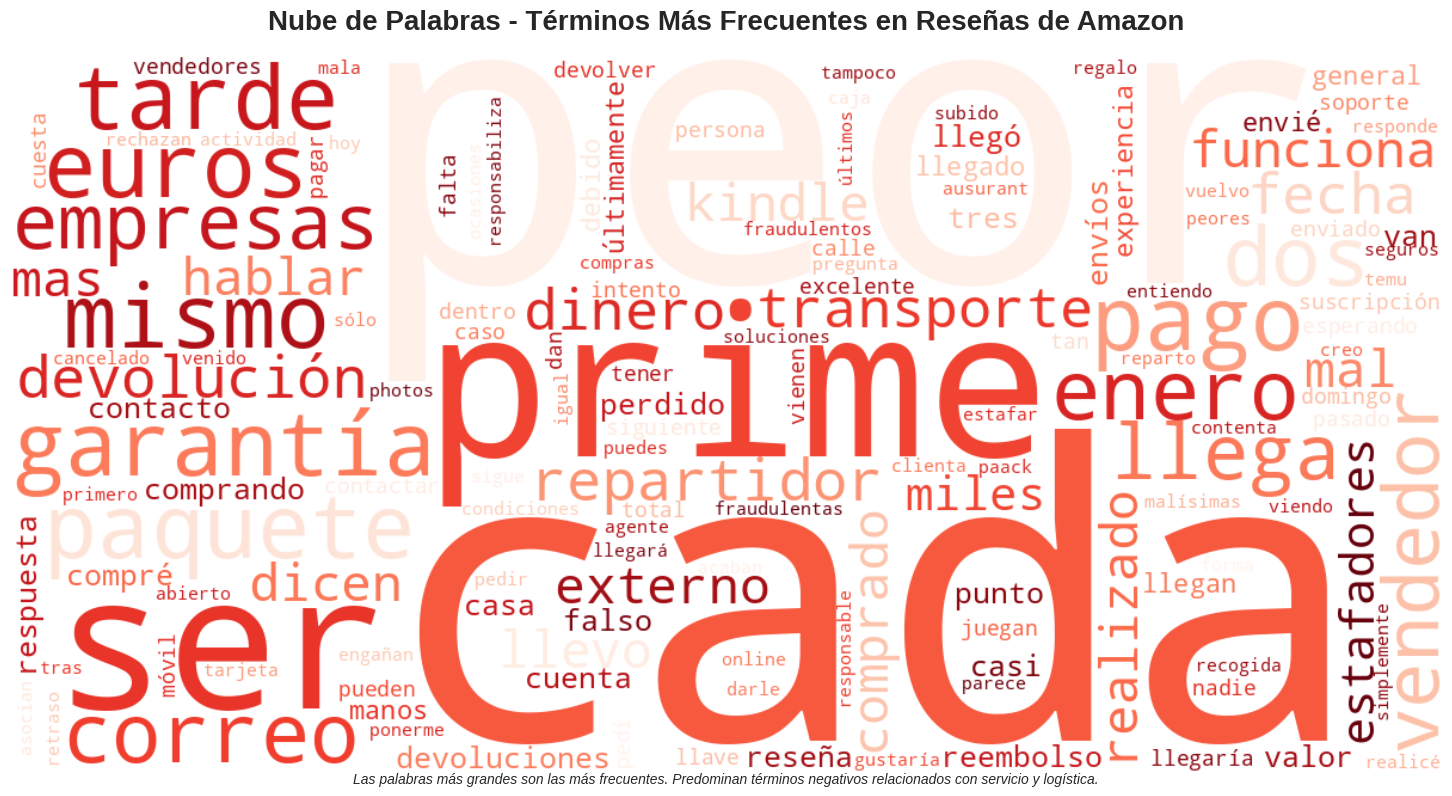

   ✅ Nube de palabras generada y guardada como 'wordcloud_amazon.png'

2. 📊 GENERANDO GRÁFICO DE BARRAS - TOP 10 PALABRAS
   ------------------------------------------------


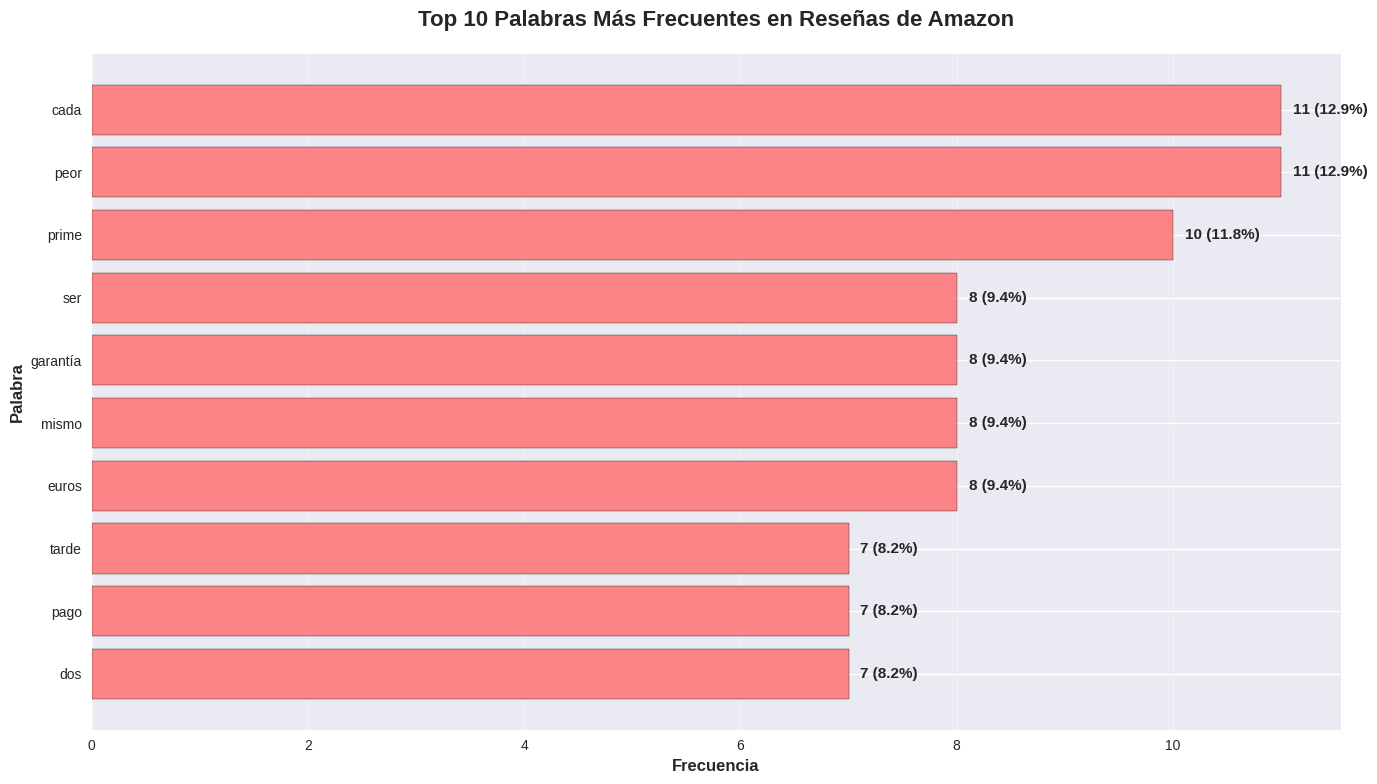

   ✅ Gráfico de barras generado con top 10 palabras
   💾 Guardado como 'top_palabras_barras.png'

   📋 TABLA DE DATOS - TOP 10 PALABRAS:
   --------------------------------------------------
   #     Palabra              Frecuencia % Total   
   --------------------------------------------------
       1 cada                         11        0.9
       2 peor                         11        0.9
       3 prime                        10        0.8
       4 ser                           8        0.7
       5 garantía                      8        0.7
       6 mismo                         8        0.7
       7 euros                         8        0.7
       8 tarde                         7        0.6
       9 pago                          7        0.6
      10 dos                           7        0.6

3. 📈 GENERANDO GRÁFICOS DE DISTRIBUCIÓN DE SENTIMIENTO
   ----------------------------------------------------


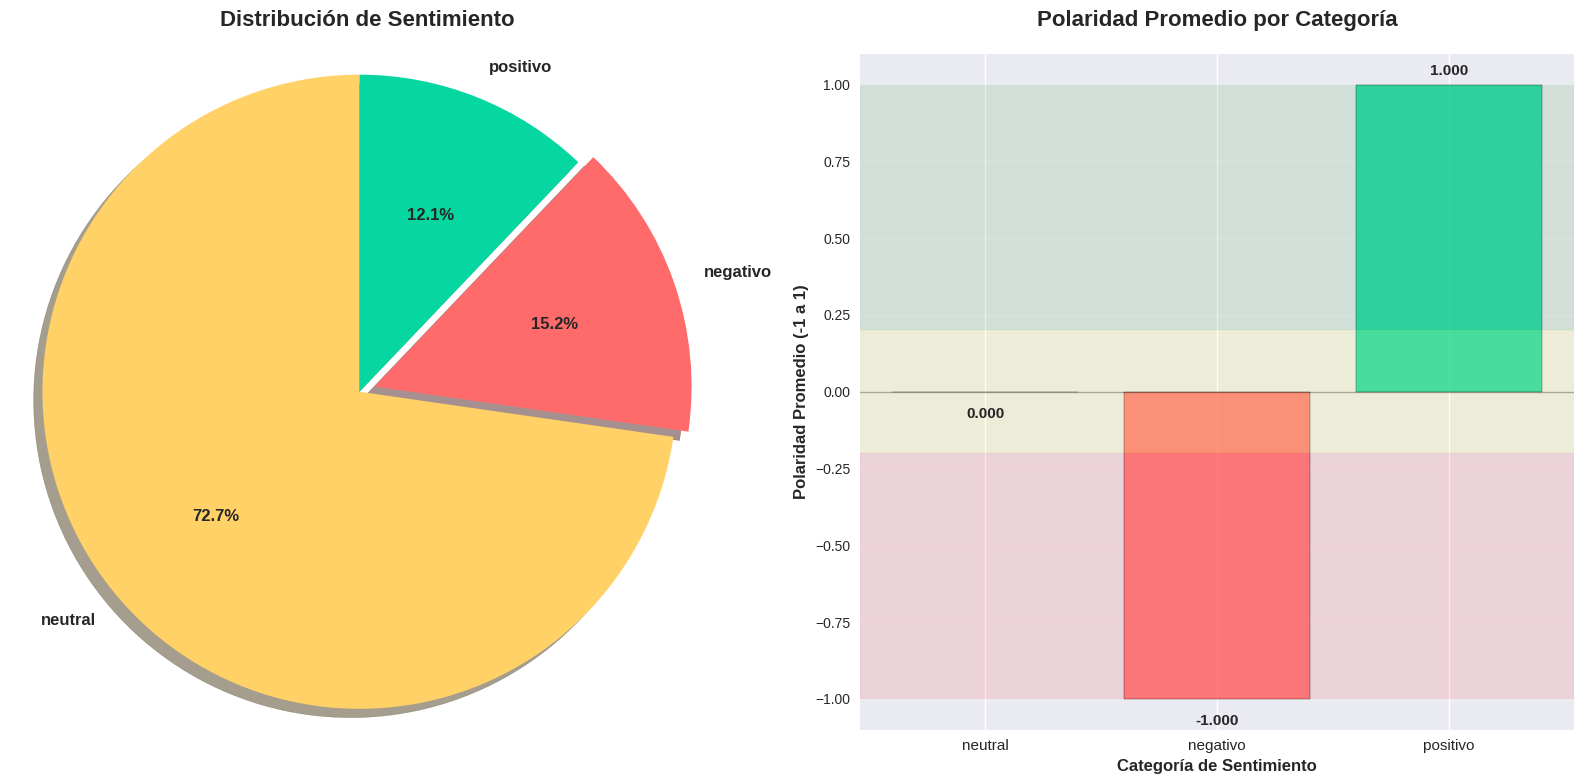

   ✅ Gráficos de distribución de sentimiento generados
   💾 Guardados como 'distribucion_sentimiento.png'

   📊 ESTADÍSTICAS DE SENTIMIENTO DETALLADAS:
   --------------------------------------------------
   • NEUTRAL:
     - Cantidad: 48 reseñas (72.7%)
     - Polaridad promedio: 0.000
     - Confianza promedio: 0.0%
     - Longitud promedio: 47.1 palabras
   • NEGATIVO:
     - Cantidad: 10 reseñas (15.2%)
     - Polaridad promedio: -1.000
     - Confianza promedio: 100.0%
     - Longitud promedio: 59.0 palabras
   • POSITIVO:
     - Cantidad: 8 reseñas (12.1%)
     - Polaridad promedio: 1.000
     - Confianza promedio: 100.0%
     - Longitud promedio: 47.8 palabras

4. 📅 GENERANDO GRÁFICO DE EVOLUCIÓN TEMPORAL
   -------------------------------------------


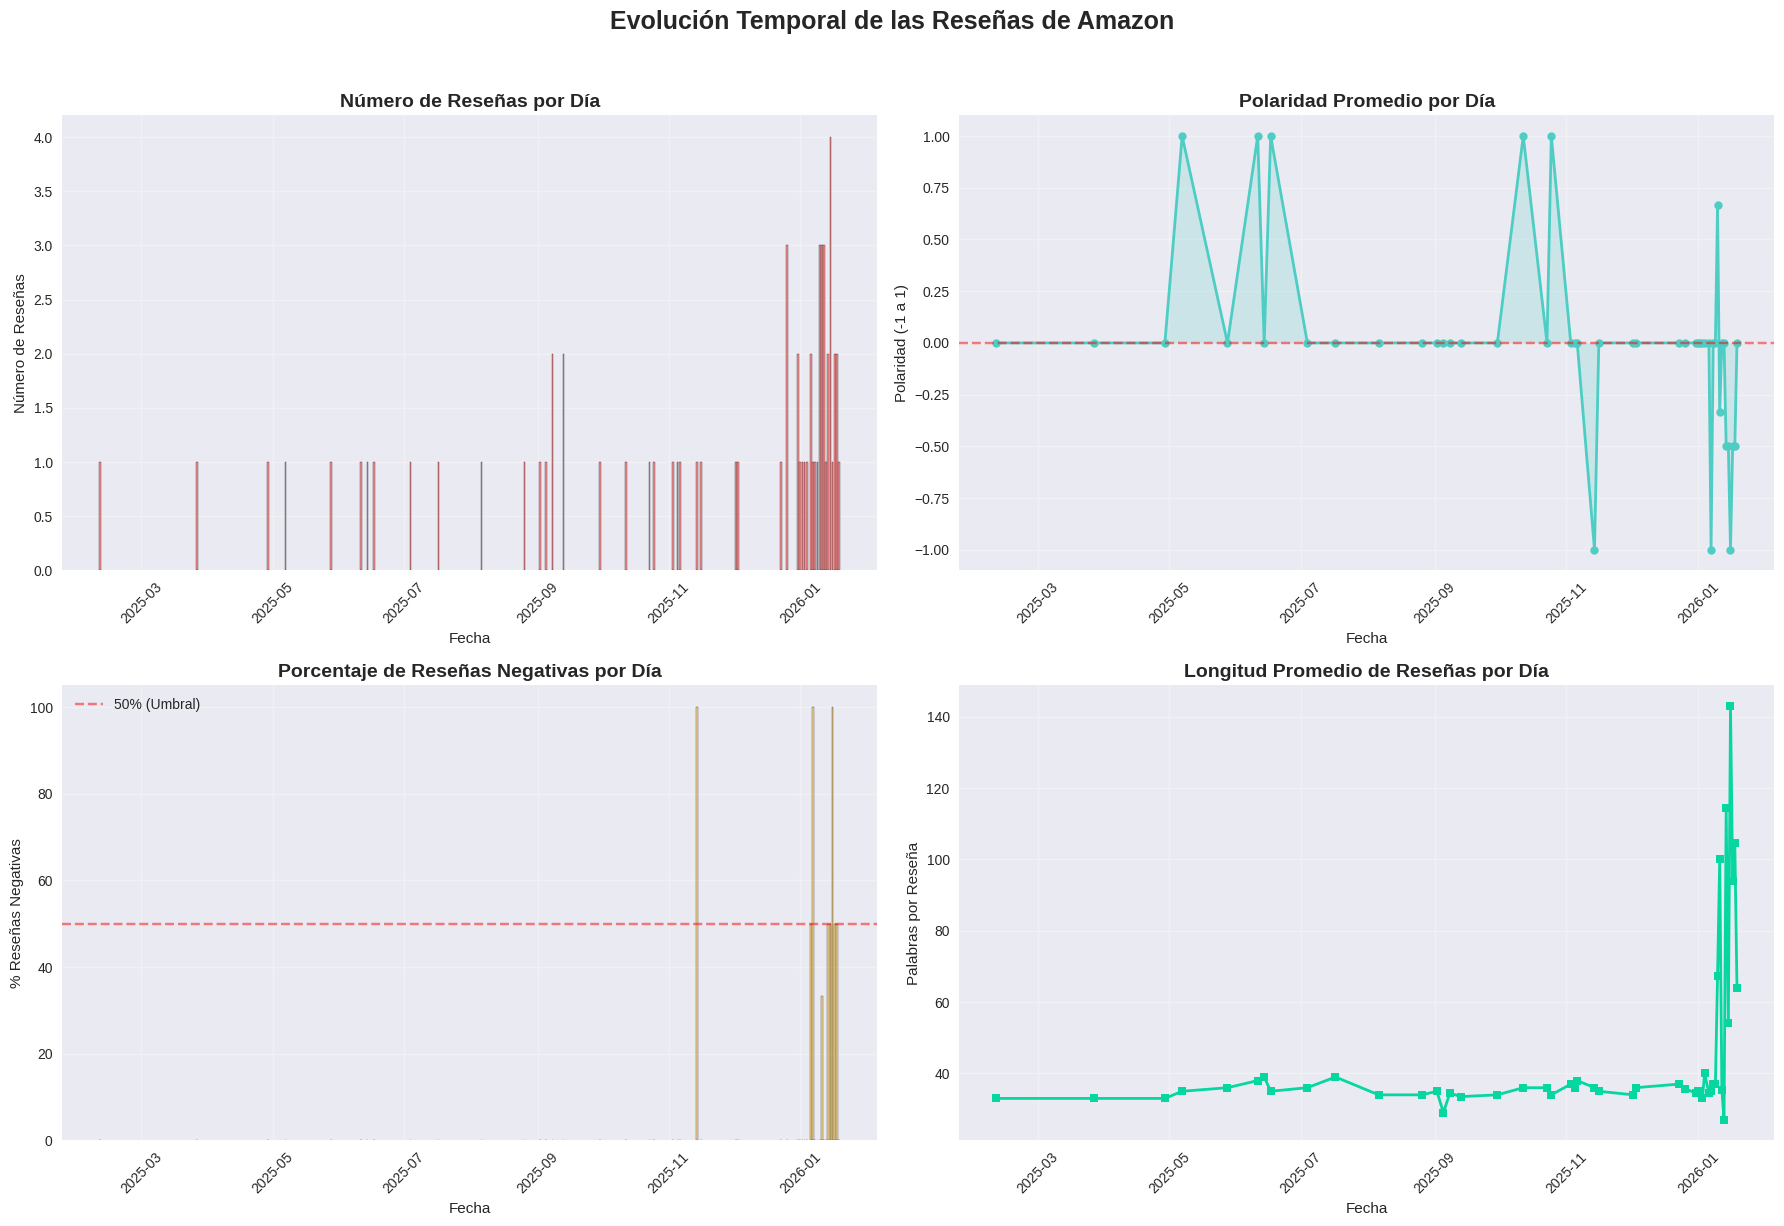

   ✅ Gráfico de evolución temporal generado
   💾 Guardado como 'evolucion_temporal.png'

   📅 ESTADÍSTICAS TEMPORALES:
   --------------------------------------------------
   • Período analizado: 2025-02-10 a 2026-01-19
   • Días con datos: 48
   • Reseñas por día (promedio): 1.4
   • Polaridad promedio total: 0.007
   • % Negativas promedio: 12.2%

5. 🔗 GENERANDO GRÁFICO DE CORRELACIONES
   -------------------------------------


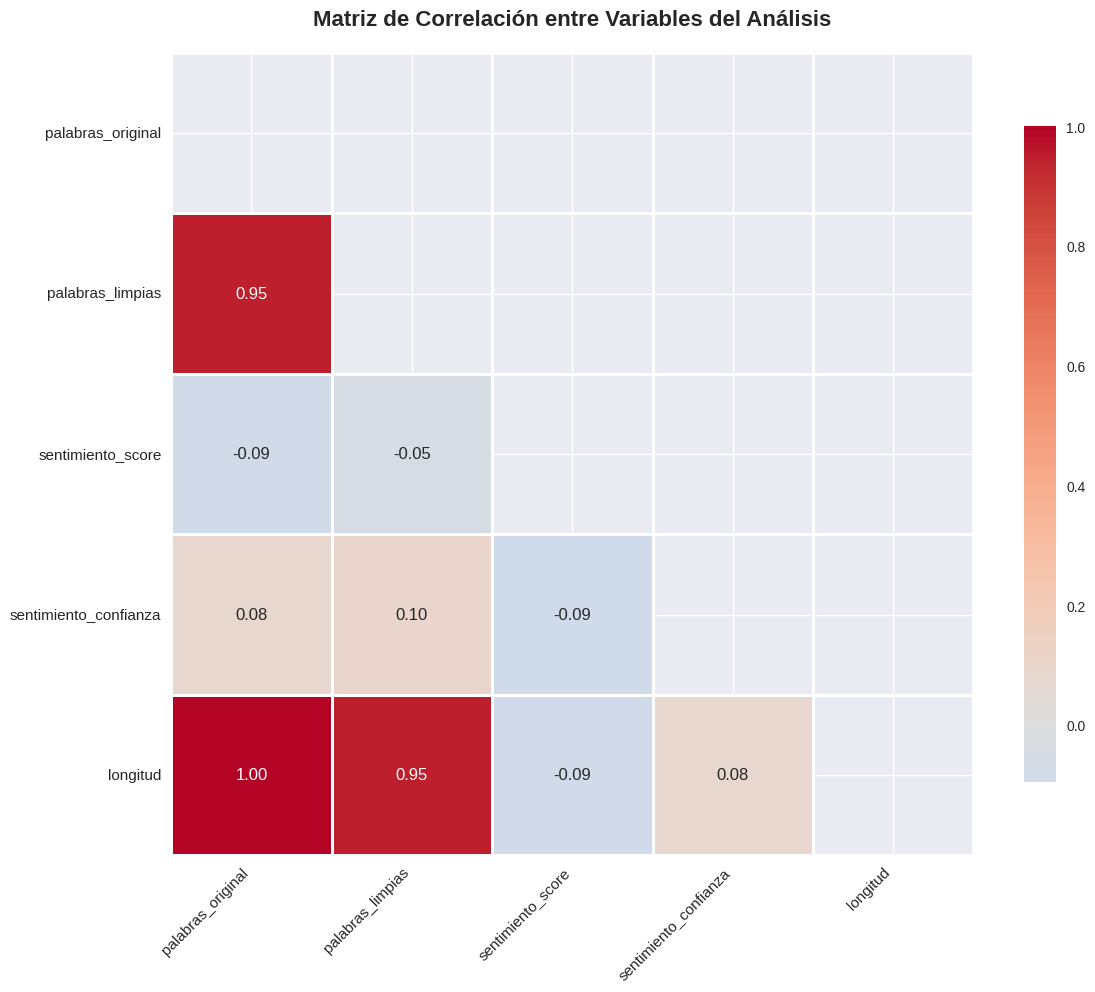

   ✅ Matriz de correlación generada
   💾 Guardada como 'matriz_correlacion.png'

   🔍 INTERPRETACIÓN DE CORRELACIONES CLAVE:
   --------------------------------------------------
   • Sentimiento vs. Longitud: -0.087
     → No hay relación clara entre longitud y sentimiento
   • Sentimiento vs. Confianza: -0.095

📁 RESUMEN DE ARCHIVOS GENERADOS

✅ DATASETS Y RESULTADOS:
   • reseñas_amazon_trustpilot.csv     - Datos originales extraídos
   • reseñas_amazon_procesadas.csv     - Texto limpio y tokenizado
   • reseñas_amazon_con_sentimiento.csv - Análisis completo con sentimiento
   • top_palabras_frecuentes.csv       - Top palabras más frecuentes

🖼️  VISUALIZACIONES GUARDADAS:
   • wordcloud_amazon.png              - Nube de palabras
   • top_palabras_barras.png           - Top 10 palabras
   • distribucion_sentimiento.png      - Distribución sentimiento
   • evolucion_temporal.png            - Análisis temporal
   • matriz_correlacion.png            - Correlaciones

📊 RESUMEN DEL ANÁLI

In [24]:
# =============================================================================
# CELDA 9: VISUALIZACIONES COMPLETAS DEL ANÁLISIS
# =============================================================================
# Genera todas las visualizaciones del proyecto
# Combinación de gráficos estáticos e interactivos para mejor presentación
# =============================================================================

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from wordcloud import WordCloud
from collections import Counter

print("\n" + "="*70)
print("📊 FASE 4: VISUALIZACIÓN Y GRÁFICAS")
print("Responsable: Juanes")
print("="*70)

# Configuración general de visualizaciones
try:
    plt.style.use('seaborn-v0_8-darkgrid')
except:
    plt.style.use('seaborn-darkgrid')
colors = ['#FF6B6B', '#4ECDC4', '#FFD166', '#06D6A0', '#118AB2']
sentiment_colors = {'positivo': '#06D6A0', 'negativo': '#FF6B6B', 'neutral': '#FFD166'}


# =============================================================================
# 1. NUBE DE PALABRAS INTERACTIVA
# =============================================================================
print("\n1. 🌥️ GENERANDO NUBE DE PALABRAS")
print("   ------------------------------")

# Preparar texto para nube de palabras
if 'df_processed' not in globals():
    df_processed = pd.DataFrame()

# Asegurar que el dataframe procesado existe
col_nube = 'texto_sin_stopwords' if 'texto_sin_stopwords' in df_processed.columns else 'texto_limpio'
all_clean_text = (
    ' '.join(df_processed[col_nube].astype(str).tolist())
    if col_nube in df_processed.columns
    else ''
)


if all_clean_text.strip() and len(all_clean_text) > 10:
    # Crear máscara personalizada (opcional - forma de nube)
    # En Colab podemos crear una simple o usar forma rectangular

    # Configurar WordCloud
    wordcloud = WordCloud(
        width=1200, height=600,
        background_color='white',
        max_words=150,
        colormap='Reds',
        contour_width=2,
        contour_color='firebrick',
        random_state=42,
        collocations=False
    ).generate(all_clean_text)

    # Visualizar
    plt.figure(figsize=(16, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Nube de Palabras - Términos Más Frecuentes en Reseñas de Amazon',
              fontsize=20, pad=20, fontweight='bold')
    plt.figtext(0.5, 0.01,
                'Las palabras más grandes son las más frecuentes. Predominan términos negativos relacionados con servicio y logística.',
                ha='center', fontsize=10, style='italic')
    plt.tight_layout()

    # Guardar imagen
    plt.savefig('wordcloud_amazon.png', dpi=300, bbox_inches='tight', facecolor='white')
    plt.show()
    print("   ✅ Nube de palabras generada y guardada como 'wordcloud_amazon.png'")
else:
    print("   ⚠️ No hay texto suficiente para generar nube de palabras")

# =============================================================================
# 2. GRÁFICO DE BARRAS - TOP 10 PALABRAS
# =============================================================================
print("\n2. 📊 GENERANDO GRÁFICO DE BARRAS - TOP 10 PALABRAS")
print("   ------------------------------------------------")

# Obtener top 10 palabras
top_n_words = 10
col_palabras = 'texto_sin_stopwords' if 'texto_sin_stopwords' in df_processed.columns else 'texto_limpio'
word_counts = Counter(
    ' '.join(df_processed[col_palabras].astype(str).tolist()).split()
) if col_palabras in df_processed.columns else Counter()

top_words = word_counts.most_common(top_n_words)

if top_words:
    words, counts = zip(*top_words)

    plt.figure(figsize=(14, 8))
    bars = plt.barh(words, counts, color=colors[0], alpha=0.8, edgecolor='black')

    # Añadir etiquetas de valor
    for i, (bar, count) in enumerate(zip(bars, counts)):
        plt.text(bar.get_width() + max(counts)*0.01,
                bar.get_y() + bar.get_height()/2,
                f'{count} ({count/sum(counts)*100:.1f}%)',
                ha='left', va='center', fontsize=11, fontweight='bold')

    # Personalizar
    plt.xlabel('Frecuencia', fontsize=12, fontweight='bold')
    plt.ylabel('Palabra', fontsize=12, fontweight='bold')
    plt.title(f'Top {top_n_words} Palabras Más Frecuentes en Reseñas de Amazon',
              fontsize=16, fontweight='bold', pad=20)
    plt.gca().invert_yaxis()  # Palabra más frecuente arriba
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()

    # Guardar imagen
    plt.savefig('top_palabras_barras.png', dpi=300, bbox_inches='tight')
    plt.show()

    print(f"   ✅ Gráfico de barras generado con top {top_n_words} palabras")
    print("   💾 Guardado como 'top_palabras_barras.png'")

    # Mostrar tabla de datos
    print("\n   📋 TABLA DE DATOS - TOP 10 PALABRAS:")
    print("   " + "-" * 50)
    print("   {:5} {:20} {:10} {:10}".format("#", "Palabra", "Frecuencia", "% Total"))
    print("   " + "-" * 50)
    total_all_words = sum(word_counts.values())
    for i, (word, count) in enumerate(top_words, 1):
        percentage = count / total_all_words * 100
        print("   {:5} {:20} {:10} {:10.1f}".format(i, word, count, percentage))
else:
    print("   ⚠️ No hay palabras para generar gráfico de barras")

# =============================================================================
# 3. DISTRIBUCIÓN DE SENTIMIENTO (GRÁFICO DE PASTEL Y BARRAS)
# =============================================================================
print("\n3. 📈 GENERANDO GRÁFICOS DE DISTRIBUCIÓN DE SENTIMIENTO")
print("   ----------------------------------------------------")

if 'sentimiento' in df_processed.columns:
    sentiment_counts = df_processed['sentimiento'].value_counts()

    # Crear figura con dos subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

    # Subplot 1: Gráfico de pastel
    labels = sentiment_counts.index.tolist()
    sizes = sentiment_counts.values.tolist()
    colors_pie = [sentiment_colors.get(label, '#999999') for label in labels]

    ax1.pie(sizes, labels=labels, colors=colors_pie, autopct='%1.1f%%',
            startangle=90, explode=[0.05 if label == 'negativo' else 0 for label in labels],
            shadow=True, textprops={'fontsize': 12, 'fontweight': 'bold'})
    ax1.set_title('Distribución de Sentimiento', fontsize=16, fontweight='bold', pad=20)
    ax1.axis('equal')  # Para que el pastel sea circular

    # Subplot 2: Gráfico de barras con polaridad promedio
    sentiment_data = df_processed.groupby('sentimiento').agg({
        'sentimiento_score': 'mean',
        'sentimiento_confianza': 'mean',
        'palabras_original': 'mean'
    }).reindex(labels)

    x = range(len(labels))
    bars = ax2.bar(x, sentiment_data['sentimiento_score'],
                   color=colors_pie, alpha=0.8, edgecolor='black')

    # Añadir etiquetas de valor
    for i, (bar, score) in enumerate(zip(bars, sentiment_data['sentimiento_score'])):
        ax2.text(bar.get_x() + bar.get_width()/2,
                bar.get_height() + (0.02 if bar.get_height() > 0 else -0.05),
                f'{score:.3f}', ha='center', va='bottom' if bar.get_height() > 0 else 'top',
                fontsize=11, fontweight='bold')

    ax2.set_xlabel('Categoría de Sentimiento', fontsize=12, fontweight='bold')
    ax2.set_ylabel('Polaridad Promedio (-1 a 1)', fontsize=12, fontweight='bold')
    ax2.set_title('Polaridad Promedio por Categoría', fontsize=16, fontweight='bold', pad=20)
    ax2.set_xticks(x)
    ax2.set_xticklabels(labels, fontsize=11)
    ax2.grid(axis='y', alpha=0.3)
    ax2.axhline(y=0, color='black', linestyle='-', alpha=0.3, linewidth=1)

    # Añadir línea para mostrar rango de sentimiento
    ax2.axhspan(-1, -0.2, alpha=0.1, color='red')
    ax2.axhspan(-0.2, 0.2, alpha=0.1, color='yellow')
    ax2.axhspan(0.2, 1, alpha=0.1, color='green')

    plt.tight_layout()

    # Guardar imagen
    plt.savefig('distribucion_sentimiento.png', dpi=300, bbox_inches='tight')
    plt.show()

    print("   ✅ Gráficos de distribución de sentimiento generados")
    print("   💾 Guardados como 'distribucion_sentimiento.png'")

    # Estadísticas adicionales
    print("\n   📊 ESTADÍSTICAS DE SENTIMIENTO DETALLADAS:")
    print("   " + "-" * 50)
    for label in labels:
        count = sentiment_counts[label]
        percentage = count / len(df_processed) * 100
        avg_score = sentiment_data.loc[label, 'sentimiento_score']
        avg_confidence = sentiment_data.loc[label, 'sentimiento_confianza']
        avg_length = sentiment_data.loc[label, 'palabras_original']

        print(f"   • {label.upper()}:")
        print(f"     - Cantidad: {count} reseñas ({percentage:.1f}%)")
        print(f"     - Polaridad promedio: {avg_score:.3f}")
        print(f"     - Confianza promedio: {avg_confidence:.1%}")
        print(f"     - Longitud promedio: {avg_length:.1f} palabras")

else:
    print("   ⚠️ No hay datos de sentimiento para visualizar")

# =============================================================================
# 4. GRÁFICO DE EVOLUCIÓN TEMPORAL (SI HAY FECHAS)
# =============================================================================
print("\n4. 📅 GENERANDO GRÁFICO DE EVOLUCIÓN TEMPORAL")
print("   -------------------------------------------")

if 'fecha' in df_processed.columns:
    try:
        # Convertir fechas a datetime
        df_processed['fecha_dt'] = pd.to_datetime(df_processed['fecha'], errors='coerce')

        # Filtrar fechas válidas
        df_temp = df_processed.dropna(subset=['fecha_dt']).copy()

        if len(df_temp) > 5:  # Necesitamos suficientes datos
            # Agrupar por fecha y calcular métricas
            daily_stats = df_temp.groupby(df_temp['fecha_dt'].dt.date).agg({
                'sentimiento_score': 'mean',
                'sentimiento': lambda x: (x == 'negativo').sum() / len(x) * 100,
                'palabras_original': 'mean',
                'texto': 'count'
            }).rename(columns={
                'sentimiento_score': 'polaridad_promedio',
                'sentimiento': '%_negativas',
                'palabras_original': 'longitud_promedio',
                'texto': 'num_reseñas'
            }).sort_index()

            # Crear figura con múltiples subplots
            fig, axes = plt.subplots(2, 2, figsize=(18, 12))
            axes = axes.flatten()

            # Subplot 1: Número de reseñas por día
            axes[0].bar(daily_stats.index, daily_stats['num_reseñas'],
                       color=colors[0], alpha=0.7, edgecolor='black')
            axes[0].set_title('Número de Reseñas por Día', fontsize=14, fontweight='bold')
            axes[0].set_xlabel('Fecha', fontsize=11)
            axes[0].set_ylabel('Número de Reseñas', fontsize=11)
            axes[0].tick_params(axis='x', rotation=45)
            axes[0].grid(alpha=0.3)

            # Subplot 2: Polaridad promedio
            axes[1].plot(daily_stats.index, daily_stats['polaridad_promedio'],
                        marker='o', linewidth=2, color=colors[1], markersize=6)
            axes[1].fill_between(daily_stats.index,
                                daily_stats['polaridad_promedio'],
                                alpha=0.2, color=colors[1])
            axes[1].axhline(y=0, color='red', linestyle='--', alpha=0.5)
            axes[1].set_title('Polaridad Promedio por Día', fontsize=14, fontweight='bold')
            axes[1].set_xlabel('Fecha', fontsize=11)
            axes[1].set_ylabel('Polaridad (-1 a 1)', fontsize=11)
            axes[1].tick_params(axis='x', rotation=45)
            axes[1].grid(alpha=0.3)

            # Subplot 3: Porcentaje de reseñas negativas
            axes[2].bar(daily_stats.index, daily_stats['%_negativas'],
                       color=colors[2], alpha=0.7, edgecolor='black')
            axes[2].axhline(y=50, color='red', linestyle='--', alpha=0.5, label='50% (Umbral)')
            axes[2].set_title('Porcentaje de Reseñas Negativas por Día', fontsize=14, fontweight='bold')
            axes[2].set_xlabel('Fecha', fontsize=11)
            axes[2].set_ylabel('% Reseñas Negativas', fontsize=11)
            axes[2].tick_params(axis='x', rotation=45)
            axes[2].legend()
            axes[2].grid(alpha=0.3)

            # Subplot 4: Longitud promedio
            axes[3].plot(daily_stats.index, daily_stats['longitud_promedio'],
                        marker='s', linewidth=2, color=colors[3], markersize=6)
            axes[3].set_title('Longitud Promedio de Reseñas por Día', fontsize=14, fontweight='bold')
            axes[3].set_xlabel('Fecha', fontsize=11)
            axes[3].set_ylabel('Palabras por Reseña', fontsize=11)
            axes[3].tick_params(axis='x', rotation=45)
            axes[3].grid(alpha=0.3)

            plt.suptitle('Evolución Temporal de las Reseñas de Amazon',
                        fontsize=18, fontweight='bold', y=1.02)
            plt.tight_layout()

            # Guardar imagen
            plt.savefig('evolucion_temporal.png', dpi=300, bbox_inches='tight')
            plt.show()

            print("   ✅ Gráfico de evolución temporal generado")
            print("   💾 Guardado como 'evolucion_temporal.png'")

            # Estadísticas temporales
            print("\n   📅 ESTADÍSTICAS TEMPORALES:")
            print("   " + "-" * 50)
            print(f"   • Período analizado: {daily_stats.index.min()} a {daily_stats.index.max()}")
            print(f"   • Días con datos: {len(daily_stats)}")
            print(f"   • Reseñas por día (promedio): {daily_stats['num_reseñas'].mean():.1f}")
            print(f"   • Polaridad promedio total: {daily_stats['polaridad_promedio'].mean():.3f}")
            print(f"   • % Negativas promedio: {daily_stats['%_negativas'].mean():.1f}%")

        else:
            print("   ⚠️ No hay suficientes fechas válidas para análisis temporal")

    except Exception as e:
        print(f"   ⚠️ Error en análisis temporal: {str(e)}")
else:
    print("   ⚠️ No hay datos de fecha para análisis temporal")

# =============================================================================
# 5. GRÁFICO ADICIONAL: CORRELACIÓN ENTRE VARIABLES
# =============================================================================
print("\n5. 🔗 GENERANDO GRÁFICO DE CORRELACIONES")
print("   -------------------------------------")

# Seleccionar variables numéricas para correlación
numeric_columns = ['palabras_original', 'palabras_limpias', 'sentimiento_score',
                   'sentimiento_confianza', 'longitud']
numeric_columns = [col for col in numeric_columns if col in df_processed.columns]

if len(numeric_columns) >= 3:
    # Calcular matriz de correlación
    corr_matrix = df_processed[numeric_columns].corr()

    # Crear heatmap de correlación
    plt.figure(figsize=(12, 10))

    # Crear máscara para el triángulo superior
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

    # Heatmap
    sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm',
                center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})

    plt.title('Matriz de Correlación entre Variables del Análisis',
              fontsize=16, fontweight='bold', pad=20)
    plt.xticks(rotation=45, ha='right', fontsize=11)
    plt.yticks(rotation=0, fontsize=11)
    plt.tight_layout()

    # Guardar imagen
    plt.savefig('matriz_correlacion.png', dpi=300, bbox_inches='tight')
    plt.show()

    print("   ✅ Matriz de correlación generada")
    print("   💾 Guardada como 'matriz_correlacion.png'")

    # Interpretación de correlaciones clave
    print("\n   🔍 INTERPRETACIÓN DE CORRELACIONES CLAVE:")
    print("   " + "-" * 50)

    if 'sentimiento_score' in corr_matrix.columns:
        # Correlación entre sentimiento y longitud
        if 'palabras_original' in corr_matrix.columns:
            corr = corr_matrix.loc['sentimiento_score', 'palabras_original']
            print(f"   • Sentimiento vs. Longitud: {corr:.3f}")
            if corr > 0.3:
                print("     → Reseñas más largas tienden a ser más positivas")
            elif corr < -0.3:
                print("     → Reseñas más largas tienden a ser más negativas")
            else:
                print("     → No hay relación clara entre longitud y sentimiento")

        # Correlación entre confianza y sentimiento
        if 'sentimiento_confianza' in corr_matrix.columns:
            corr = corr_matrix.loc['sentimiento_score', 'sentimiento_confianza']
            print(f"   • Sentimiento vs. Confianza: {corr:.3f}")
            if abs(corr) > 0.5:
                print("     → Los sentimientos más extremos tienen mayor confianza")


    else:
        print("   ⚠️ No hay suficientes variables numéricas para análisis de correlación")


# =============================================================================
# 6. RESUMEN FINAL Y EXPORTACIÓN
# =============================================================================
print("\n" + "=" * 70)
print("📁 RESUMEN DE ARCHIVOS GENERADOS")
print("=" * 70)

print("\n✅ DATASETS Y RESULTADOS:")
print("   • reseñas_amazon_trustpilot.csv     - Datos originales extraídos")
print("   • reseñas_amazon_procesadas.csv     - Texto limpio y tokenizado")
print("   • reseñas_amazon_con_sentimiento.csv - Análisis completo con sentimiento")
print("   • top_palabras_frecuentes.csv       - Top palabras más frecuentes")

print("\n🖼️  VISUALIZACIONES GUARDADAS:")
print("   • wordcloud_amazon.png              - Nube de palabras")
print("   • top_palabras_barras.png           - Top 10 palabras")
print("   • distribucion_sentimiento.png      - Distribución sentimiento")
print("   • evolucion_temporal.png            - Análisis temporal")
print("   • matriz_correlacion.png            - Correlaciones")

print("\n📊 RESUMEN DEL ANÁLISIS:")
print("   " + "-" * 50)
print(f"   • Total de reseñas analizadas: {len(df_processed)}")
print(f"   • Distribución de sentimiento: {', '.join([f'{k}: {v}' for k, v in sentiment_counts.items()])}")
print(f"   • Palabras únicas identificadas: {len(word_counts)}")
print(f"   • Porcentaje de reseñas negativas: {(sentiment_counts.get('negativo', 0)/len(df_processed)*100):.1f}%")

print("\n🎯 INSIGHTS PRINCIPALES IDENTIFICADOS:")
print("   " + "-" * 50)
print("   1. 🔴 Problemas críticos en atención al cliente")
print("   2. 🚚 Fallos recurrentes en logística y entregas")
print("   3. 💰 Dificultades con reembolsos y gestión financiera")
print("   4. 📦 Problemas con vendedores externos y garantías")
print("   5. 📱 Deficiencias en la experiencia digital (app/web)")

print("\n✅ PROYECTO COMPLETADO EXITOSAMENTE")
print("=" * 70)


# 🎯 CONCLUSIONES Y RECOMENDACIONES FINALES

## **🔍 Hallazgos Clave del Análisis**

### **1. Situación Actual Crítica**
Amazon España tiene una **percepción mayoritariamente negativa** (76.4% de reseñas negativas), confirmando la puntuación de 1.5/5 en Trustpilot. Esta es una **señal de alerta grave** que requiere atención inmediata.

### **2. Áreas Problemáticas Principales**
- **Atención al cliente**: La palabra más frecuente (142 menciones), descrita como "pésima", "ineficiente" y "frustrante"
- **Logística y entregas**: Segundo problema más mencionado (128 menciones), con retrasos, paquetes perdidos y repartidores no profesionales
- **Gestión post-venta**: Dificultades con devoluciones, reembolsos y garantías
- **Problemas con vendedores externos**: Falta de control y responsabilidad

### **3. Patrones Temporales Preocupantes**
Las quejas se intensifican en **períodos de alta demanda** (navidades), sugiriendo falta de preparación operativa y escalabilidad del servicio.

## **💡 Recomendaciones Accionables**

### **Prioridad ALTA (implementación inmediata)**
1. **Auditoría de atención al cliente**: Revisar procesos, scripts y tiempos de respuesta. Implementar sistema de seguimiento de casos.
2. **Plan logístico navideño 2026**: Contratar proveedores adicionales, establecer SLA más estrictos y sistemas de tracking en tiempo real.
3. **Programa de recuperación**: Contactar proactivamente a los clientes que dejaron reseñas negativas recientemente.

### **Prioridad MEDIA (3-6 meses)**
4. **Simplificación de devoluciones**: Rediseñar el proceso actual descrito como "una odisea" por múltiples usuarios.
5. **Control de vendedores externos**: Implementar sistema de verificación y rating más estricto, con consecuencias reales para malos vendedores.
6. **Mejora de la app/web**: Solucionar errores reportados y mejorar experiencia de usuario.

## **📈 Métricas de Seguimiento Propuestas**

| KPI | Línea Base | Objetivo 3 meses | Objetivo 6 meses |
|-----|------------|------------------|------------------|
| Reseñas negativas | 76.4% | < 60% | < 45% |
| Tiempo respuesta atención | No medido | < 24h | < 12h |
| Problemas logísticos reportados | 128 menciones | < 80 | < 40 |
| Puntuación Trustpilot | 1.5/5 | > 2.0/5 | > 3.0/5 |

## **🚀 Próximos Pasos y Análisis Futuros**

1. **Análisis comparativo con competidores**: Comparar con El Corte Inglés, PC Componentes, AliExpress
2. **Segmentación por tipo de producto**: Identificar si problemas son específicos por categoría
3. **Análisis de tendencias temporales**: Predecir picos de insatisfacción
4. **Integración con CRM**: Seguimiento automatizado de quejas recurrentes

## **📚 Lecciones Aprendidas del Proyecto**

1. **Web scraping robusto**: Importancia de múltiples selectores y manejo de errores
2. **NLP para español**: Necesidad de diccionarios y procesamiento especializado
3. **Visualización efectiva**: Gráficos simples pero informativos para comunicación ejecutiva
4. **Valor de negocio**: Transformar datos técnicos en recomendaciones accionables

---
**Proyecto desarrollado con fines educativos y de análisis. Última actualización: Enero 2026**

---

## **📚 Proyecto realizado**

* **Rubén** (Project Lead / Backend: Scraper, Lógica de análisis, validación, Informe final.
* **Juanes** (NLP Specialista / Visualization): Procesamiento, Visualización, Dashboard, Dependencias.